#### 7PAM2002-0901-2024 - MSc Data Science Project

Topic - Comparing Data Augmentation Methods – Easy Data Augmentation and Back Translation for text(Intentation) Classification using LSTM.

Research Question - Which data augmentation methods applied on a small dataset outperform models trained without augmentation in terms of accuracy and precision in case of intention(text) classification using LSTM as training models, and by how much do they improve performance?

Supervisor - Dr. Man Lai Tang

Done by - Mohit Agarwal (22031257)

### Importing Packages

In [1]:
# importing required packages...
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

In [2]:
# appending the location for augment modules
import sys
sys.path.append(r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Agument")
# appending the location for modles modules
sys.path.append(r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Models")

In [3]:
# importing modules from local drives...
import preprocess_eda as preprocess
import lstm
import train_lstm
import back_translation
import eda

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agarw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# setiing plot style
plt.style.use("seaborn-v0_8-darkgrid")

#### Defining Paths

In [5]:
# path for augment plot
augment_plot_path = r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Plots\Augment"
# path for augment data
augment_data_path = r"D:\MScDataScience\7.Data_Science_Project\SourceCode\Agument\Augment_Data\Training_Validation_Testing"
# model callback path for saving models and log files
model_callback_path = r"D:\MScDataScience\7.Data_Science_Project\Model_Callbacks\Augment"

### Reading EDA Augmented Data

In [6]:
# combining the training, validation, testin data for augmentation
whole_data = pd.concat([preprocess.train_df,
                        preprocess.val_df,
                        preprocess.test_df], ignore_index=True)

In [7]:
# reading size 1 data
eda_size_1_df, eda_size_1_train, eda_size_1_val, eda_size_1_test = preprocess.load_augment(
    os.path.join(augment_data_path, r"EDA\eda_augmented_data_size_1.csv"), data=whole_data)
# reading size 2 data
eda_size_2_df, eda_size_2_train, eda_size_2_val, eda_size_2_test = preprocess.load_augment(
    os.path.join(augment_data_path, r"EDA\eda_augmented_data_size_2.csv"), data=whole_data)
# reading size 3 data
eda_size_3_df, eda_size_3_train, eda_size_3_val, eda_size_3_test = preprocess.load_augment(
    os.path.join(augment_data_path, r"EDA\eda_augmented_data_size_3.csv"), data=whole_data)
# reading size 4 data
eda_size_4df, eda_size_4_train, eda_size_4_val, eda_size_4_test = preprocess.load_augment(
    os.path.join(augment_data_path, r"EDA\eda_augmented_data_size_4.csv"), data=whole_data)
# reading size 5 data
eda_size_5_df, eda_size_5_train, eda_size_5_val, eda_size_5_test = preprocess.load_augment(
    os.path.join(augment_data_path, r"EDA\eda_augmented_data_size_5.csv"), data=whole_data)
# reading size 10 data
eda_size_10_df, eda_size_10_train, eda_size_10_val, eda_size_10_test = preprocess.load_augment(
    os.path.join(augment_data_path, r"EDA\eda_augmented_data_size_10.csv"), data=whole_data)

## Size-1

### Exploratory Data Analysis For EDA Size-1 Augmented Data 

The length of the training data:  15000
The length of the testing data:  9000
The length of the validation data:  6000


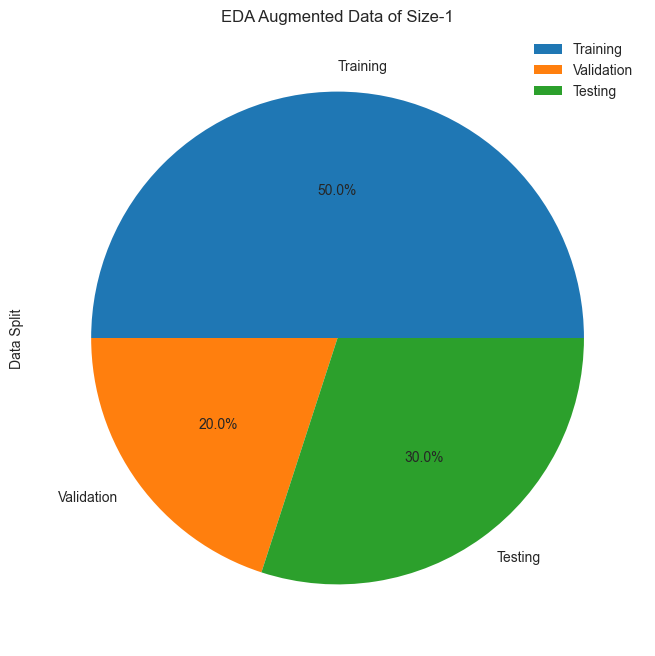

In [8]:
preprocess.records_per_set(train=eda_size_1_train,
                           val=eda_size_1_val,
                           test=eda_size_1_test,
                           title="EDA Augmented Data of Size-1")

##### Training Set - Before Preprocessing

[INFO] Minimum Number of Charaters in a query is:  1
[INFO] Maximum Number of Charaters in a query is:  145


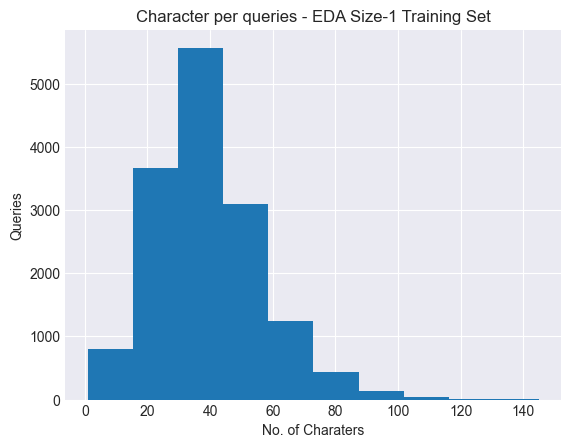

[INFO] Minimum Number of Words in a query is:  1
[INFO] Maximum Number of Words in a query is:  27


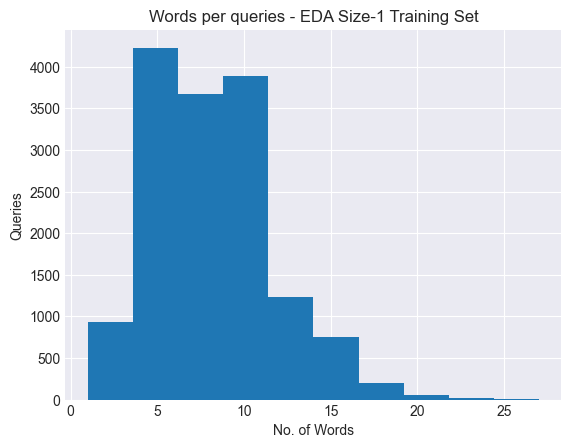

[INFO] Minimum Number of Average Words Length in a query is:  1.0
[INFO] Maximum Number of Average Words Length in a query is:  11.0


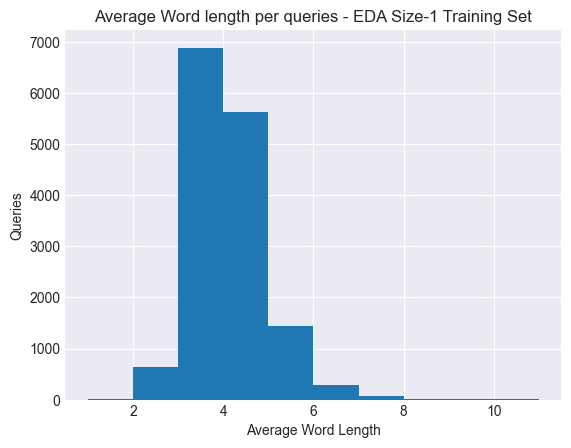


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  6254


In [9]:
# exploring the training data
train_explore = preprocess.eda(data=eda_size_1_train,
                               path=os.path.join(augment_plot_path, r"EDA\Before_Preprocessing\Training"))
# plotting number of character per record
train_explore.char_per_query(title="EDA Size-1 Training Set")
# plotting number of words per record
train_explore.word_per_query(title="EDA Size-1 Training Set")
# plotting average word length per record
train_explore.avg_word_len_per_query(title="EDA Size-1 Training Set")
# line graph of word frequency per class
train_word_freq_dict = train_explore.word_freq_per_class(title="EDA Size-1 Training Set")
# worldcloud of word frequency per class
train_worldcloud_dict = train_explore.word_cloud_per_class(
    title="EDA Size-1 Training Set")
# number of unique words
train_num_unique_words = train_explore.vocabulary()
print("\n[INFO] The vocabulary size is: ", train_num_unique_words)

The length of the queries is the tarining set is not long. Most queries has in 4 to 11 words, highest beign 25.

##### Validation Set - Before Preprocessing

[INFO] Minimum Number of Charaters in a query is:  2
[INFO] Maximum Number of Charaters in a query is:  147


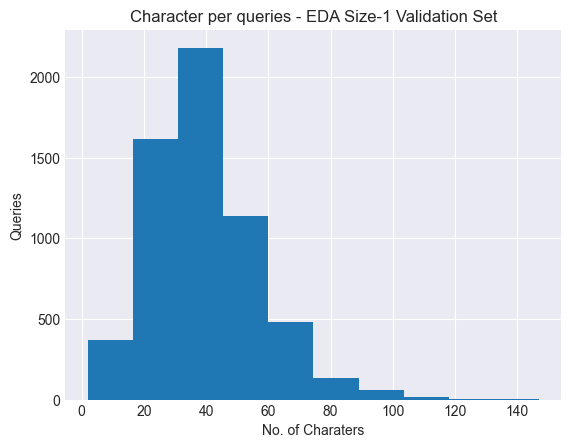

[INFO] Minimum Number of Words in a query is:  1
[INFO] Maximum Number of Words in a query is:  30


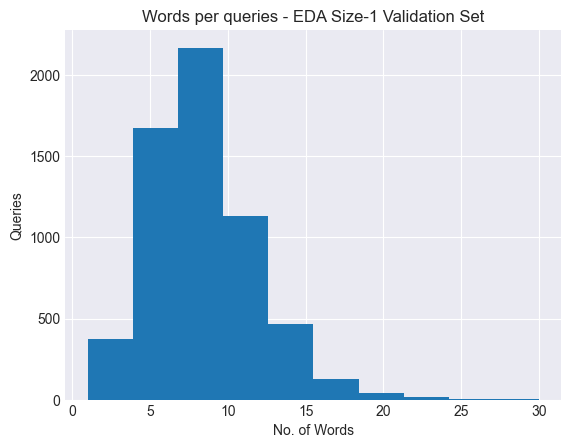

[INFO] Minimum Number of Average Words Length in a query is:  1.5
[INFO] Maximum Number of Average Words Length in a query is:  10.0


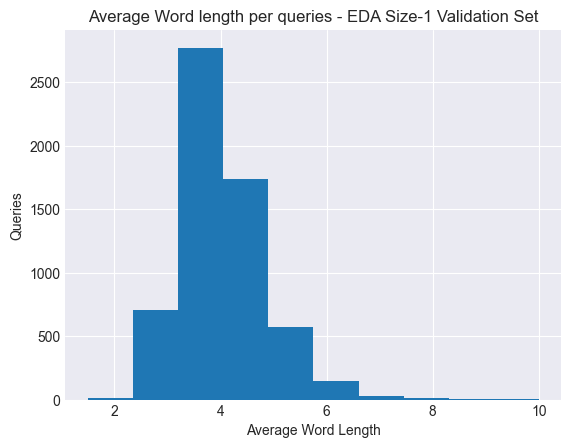


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  4101


In [10]:
# exploring the validation data
val_explore = preprocess.eda(data=eda_size_1_val,
                             path=os.path.join(augment_plot_path, r"EDA\Before_Preprocessing\Validation"))
# plotting number of character per record
val_explore.char_per_query(title="EDA Size-1 Validation Set")
# plotting number of words per record
val_explore.word_per_query(title="EDA Size-1 Validation Set")
# plotting average word length per record
val_explore.avg_word_len_per_query(title="EDA Size-1 Validation Set")
# line graph of word frequency per class
val_word_freq_dict = val_explore.word_freq_per_class(title="EDA Size-1 Validation Set")
# worldcloud of word frequency per class
val_worldcloud_dict = val_explore.word_cloud_per_class(
    title="EDA Size-1 Validation Set")
# number of unique words
val_num_unique_words = val_explore.vocabulary()
print("\n[INFO] The vocabulary size is: ", val_num_unique_words)

The average word

##### Testing Set - Before Preprocessing

[INFO] Minimum Number of Charaters in a query is:  2
[INFO] Maximum Number of Charaters in a query is:  181


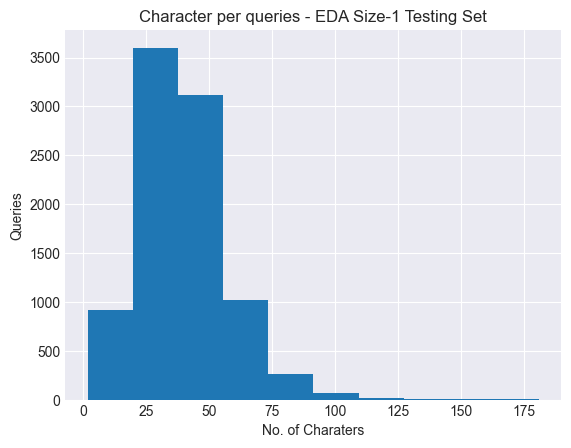

[INFO] Minimum Number of Words in a query is:  1
[INFO] Maximum Number of Words in a query is:  33


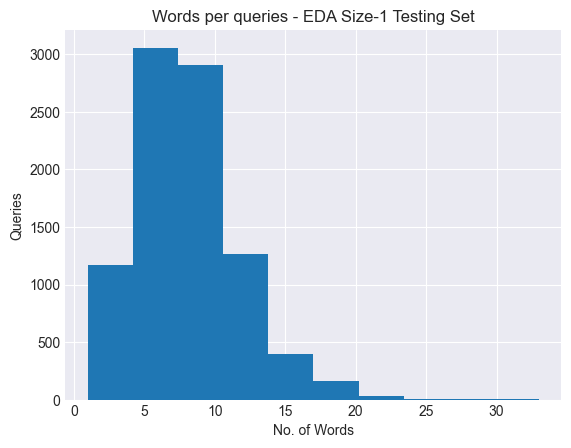

[INFO] Minimum Number of Average Words Length in a query is:  1.5
[INFO] Maximum Number of Average Words Length in a query is:  11.0


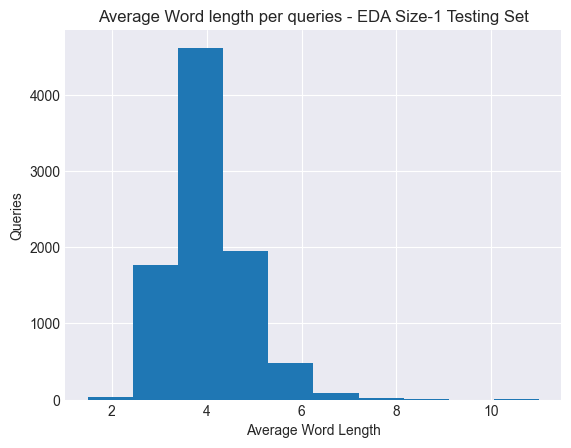


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  5018


In [11]:
# exploring the testing data
test_explore = preprocess.eda(data=eda_size_1_test,
                              path=os.path.join(augment_plot_path, r"EDA\Before_Preprocessing\Testing"))
# plotting number of character per record
test_explore.char_per_query(title="EDA Size-1 Testing Set")
# plotting number of words per record
test_explore.word_per_query(title="EDA Size-1 Testing Set")
# plotting average word length per record
test_explore.avg_word_len_per_query(title="EDA Size-1 Testing Set")
# line graph of word frequency per class
test_word_freq_dict = test_explore.word_freq_per_class(title="EDA Size-1 Testing Set")
# worldcloud of word frequency per class
test_worldcloud_dict = test_explore.word_cloud_per_class(title="EDA Size-1 Testing Set")
# number of unique words
test_num_unique_words = test_explore.vocabulary()
print("\n[INFO] The vocabulary size is: ", test_num_unique_words)

### Preprocessing the EDA Size-1 Augmented Data 

In [8]:
# preprocessing the training set
train_preprocess = preprocess.pre_process(eda_size_1_train)
x_train = train_preprocess.preprocess()
# lemmentizing the preprocessed data
x_train = train_preprocess.lemmatise()

# encoding the classes to one-hot format
y_train = train_preprocess.encode_class()

In [9]:
# preprocessing the validation set
val_preprocess = preprocess.pre_process(eda_size_1_val)
x_val = val_preprocess.preprocess()
# lemmentizing the preprocessed data
x_val = val_preprocess.lemmatise()

# encoding the classes to one-hot format
y_val = val_preprocess.encode_class()

In [10]:
# preprocessing the testing set
test_preprocess = preprocess.pre_process(eda_size_1_test)
x_test = test_preprocess.preprocess()
# lemmentizing the preprocessed data
x_test = test_preprocess.lemmatise()

# encoding the classes to one-hot format
y_test = test_preprocess.encode_class()

### Exploring the Processed EDA Size-3 Augmented Datasets

##### Training Set

[INFO] Minimum Number of Charaters in a query is:  0
[INFO] Maximum Number of Charaters in a query is:  105


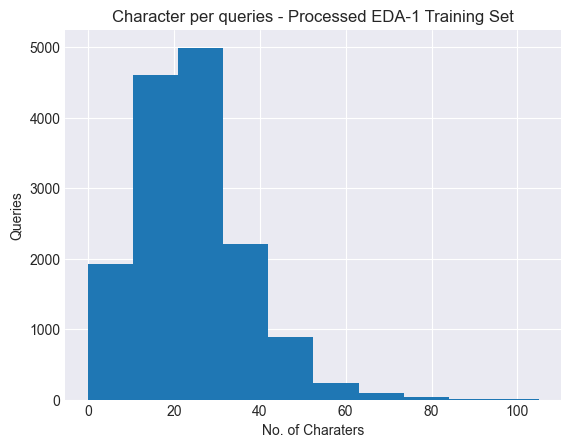

[INFO] Minimum Number of Words in a query is:  0
[INFO] Maximum Number of Words in a query is:  16


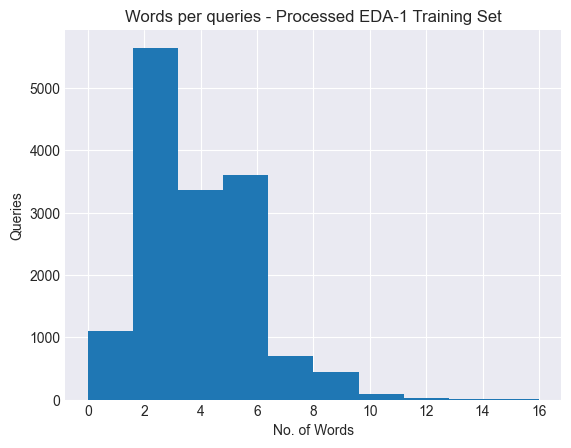

c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[INFO] Minimum Number of Average Words Length in a query is:  1.0
[INFO] Maximum Number of Average Words Length in a query is:  13.0


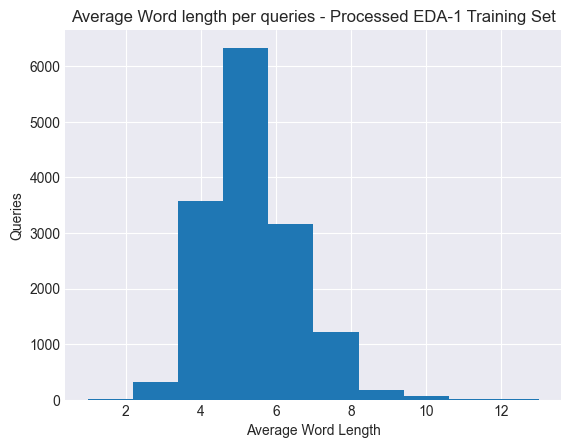


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  4954


In [15]:
# creating processed training dataframe
processed_train_df = pd.DataFrame(({"Query": x_train,
                                    "Intent": eda_size_1_train.iloc[:, 1]}))
# exploring the processed training data
processed_train_explore = preprocess.eda(data=processed_train_df,
                                         path=os.path.join(augment_plot_path, r"EDA\Preprocessed\Training"))
# plotting number of character per record
processed_train_explore.char_per_query(title="Processed EDA-1 Training Set")
# plotting number of words per record
processed_train_explore.word_per_query(title="Processed EDA-1 Training Set")
# plotting average word length per record
processed_train_explore.avg_word_len_per_query(title="Processed EDA-1 Training Set")
# line graph of word frequency per class
processed_train_word_freq_dict = processed_train_explore.word_freq_per_class(
    title="Processed EDA-1 Training Set")
# worldcloud of word frequency per class
processed_train_worldcloud_dict = processed_train_explore.word_cloud_per_class(
    title="Processed EDA-1 Training Set")
# number of unique words
processed_train_num_unique_words = processed_train_explore.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_train_num_unique_words)

##### Validation Set

[INFO] Minimum Number of Charaters in a query is:  0
[INFO] Maximum Number of Charaters in a query is:  103


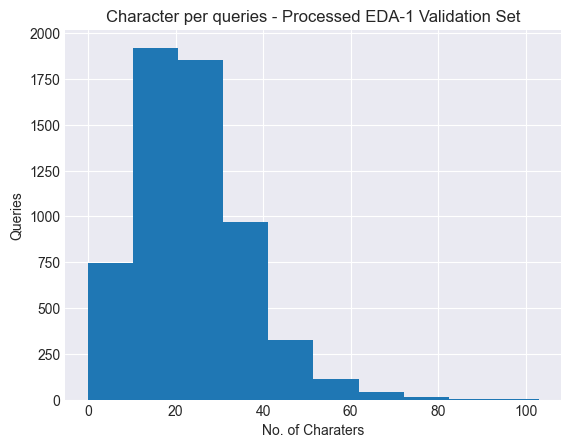

[INFO] Minimum Number of Words in a query is:  0
[INFO] Maximum Number of Words in a query is:  16


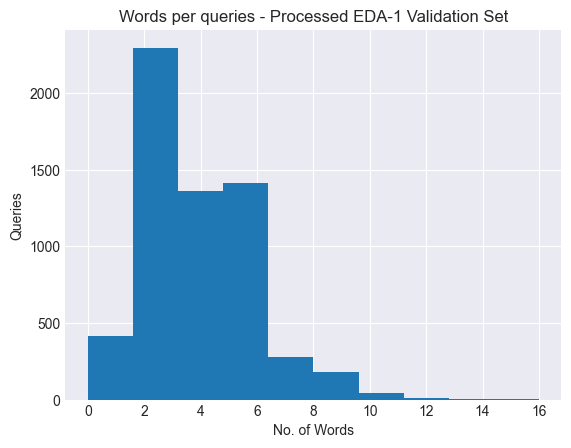

c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[INFO] Minimum Number of Average Words Length in a query is:  1.0
[INFO] Maximum Number of Average Words Length in a query is:  13.0


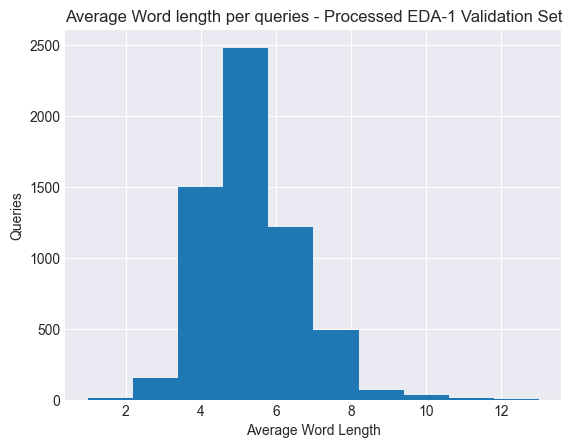


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  3272


In [16]:
# creating processed validation dataframe
processed_val_df = pd.DataFrame(({"Query": x_val,
                                  "Intent": eda_size_1_val.iloc[:, 1]}))
# exploring the processed validation data
processed_val_explore = preprocess.eda(data=processed_val_df,
                                       path=os.path.join(augment_plot_path, r"EDA\Preprocessed\Validation"))
# plotting number of character per record
processed_val_explore.char_per_query(title="Processed EDA-1 Validation Set")
# plotting number of words per record
processed_val_explore.word_per_query(title="Processed EDA-1 Validation Set")
# plotting average word length per record
processed_val_explore.avg_word_len_per_query(
    title="Processed EDA-1 Validation Set")
# line graph of word frequency per class
processed_val_word_freq_dict = processed_val_explore.word_freq_per_class(
    title="Processed EDA-1 Validation Set")
# worldcloud of word frequency per class
processed_val_worldcloud_dict = processed_val_explore.word_cloud_per_class(
    title="Processed EDA-1 Validation Set")
# number of unique words
processed_val_num_unique_words = processed_val_explore.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_val_num_unique_words)

##### Testing Set

[INFO] Minimum Number of Charaters in a query is:  0
[INFO] Maximum Number of Charaters in a query is:  132


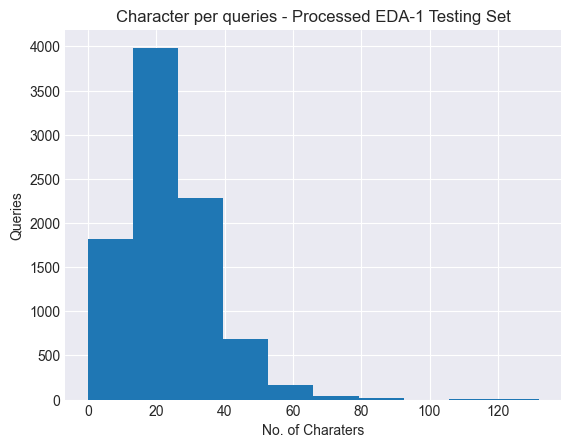

[INFO] Minimum Number of Words in a query is:  0
[INFO] Maximum Number of Words in a query is:  19


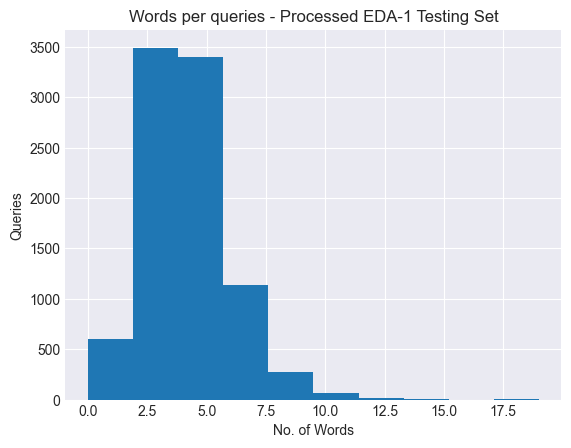

[INFO] Minimum Number of Average Words Length in a query is:  1.0
[INFO] Maximum Number of Average Words Length in a query is:  13.0


c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


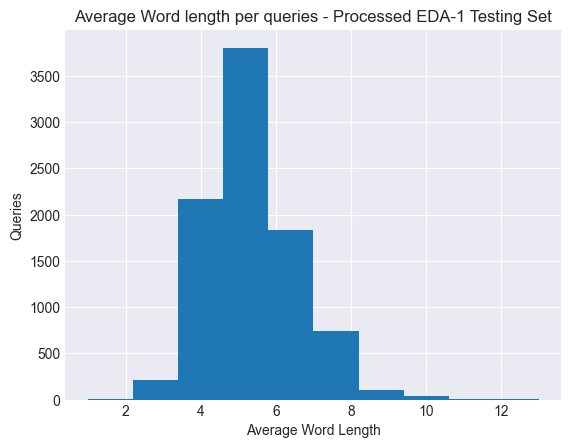


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  3982


In [17]:
# creating processed testing dataframe
processed_test_df = pd.DataFrame(({"Query": x_test,
                                   "Intent": eda_size_1_test.iloc[:, 1]}))
# exploring the processed testing data
processed_test_explore = preprocess.eda(data=processed_test_df,
                                        path=os.path.join(augment_plot_path, r"EDA\Preprocessed\Testing"))
# plotting number of character per record
processed_test_explore.char_per_query(title="Processed EDA-1 Testing Set")
# plotting number of words per record
processed_test_explore.word_per_query(title="Processed EDA-1 Testing Set")
# plotting average word length per record
processed_test_explore.avg_word_len_per_query(title="Processed EDA-1 Testing Set")
# line graph of word frequency per class
processed_test_word_freq_dict = processed_test_explore.word_freq_per_class(
    title="Processed EDA-1 Testing Set")
# worldcloud of word frequency per class
processed_test_worldcloud_dict = processed_test_explore.word_cloud_per_class(
    title="Processed EDA-1 Testing Set")
# number of unique words
processed_test_num_unique_words = processed_test_explore.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_test_num_unique_words)

### Creating a textvectorization layer using Keras

In [11]:
# setting vocabulary size
VOCAB_SIZE = 50000
# setting the oputput sequence length for textvector layer
SEQ_LEN = 25
# creating a keras text vector layer
textvector_layer = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE,
                                                     ngrams=(1, 2, 3),
                                                     output_mode="int",
                                                     output_sequence_length=SEQ_LEN)
# learning the vocabulary in the dataset from training data
textvector_layer.adapt(x_train)

### Single-LSTM

In [12]:
# single lstm path
single_lstm_model_callback = os.path.join(model_callback_path, r"EDA\Single_lstm")

#### Training the Single Layer LSTM Model with best Auto-Hyperparameter on EDA size-1

##### For 30 Epochs


Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 2.3659e-05 - f1_score: 0.0035 - loss: 5.0178 - precision: 0.0320 - val_accuracy: 0.0000e+00 - val_f1_score: 5.3628e-04 - val_loss: 4.9169 - val_precision: 0.0000e+00
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 5.0130e-05 - f1_score: 0.0074 - loss: 4.6561 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0023 - val_loss: 4.6288 - val_precision: 0.0000e+00
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.0000e+00 - f1_score: 0.0180 - loss: 4.2070 - precision: 0.0185 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0172 - val_loss: 3.9041 - val_precision: 0.0000e+00
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.0000e+00 - f1_score: 0.0468 - loss: 3.7291 - precision: 0.3306 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0722 - val_loss: 3.4111 - val_precision: 0.8333
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 2.1511e-06 - f1_scor

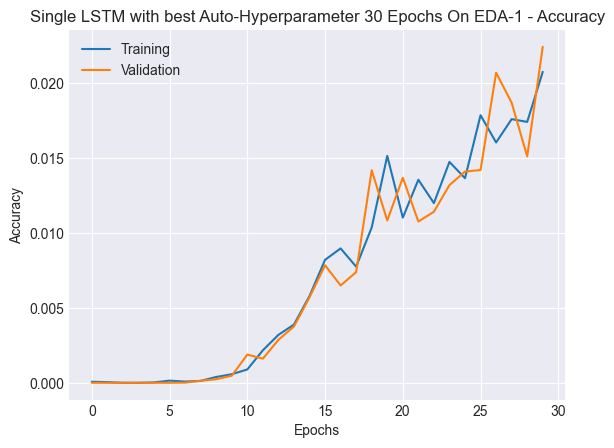

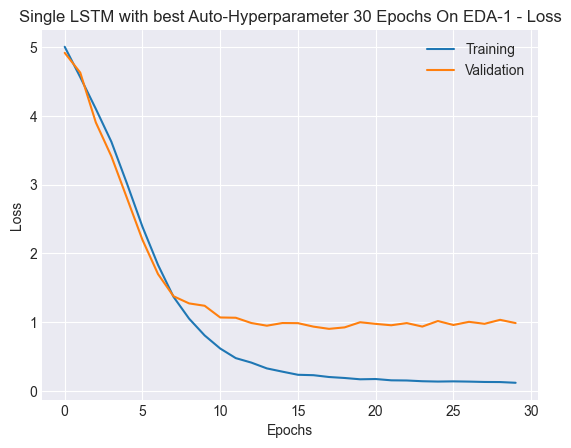

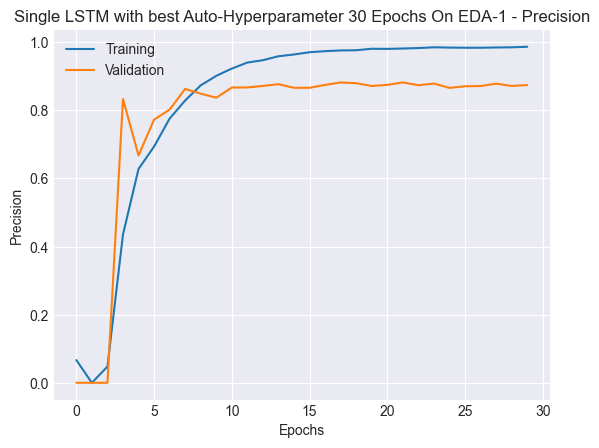

282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.0213 - f1_score: 0.8172 - loss: 1.0402 - precision: 0.8721


<Figure size 640x480 with 0 Axes>

In [13]:
# single lstm model with tuned hyperparamter
hp_lstm_model_30 = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                lstm_units=170,
                                                rate=0.275,
                                                activation="elu",
                                                optimizer="RMSprop",
                                                lr=0.0038393475795542604,
                                                num_class=preprocess.num_intent,
                                                vocab_size=VOCAB_SIZE,
                                                textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
hp_lstm_history_30 = train_lstm.model_history(x=x_train, y=y_train,
                                              x_val=x_val,
                                              y_val=y_val,
                                              path=single_lstm_model_callback,
                                              model=hp_lstm_model_30,
                                              batch_size=96,
                                              epochs=30,
                                              filename="hp_96Batch_30epochs")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_30,
                title="Single LSTM with best Auto-Hyperparameter 30 Epochs On EDA-1",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Single_LSTM"))

# evaluating the model with test dataset
hp_lstm_model_30_evaluate = hp_lstm_model_30.evaluate(
    x=x_test, y=y_test, verbose=1)

##### For 50 Epochs

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.0000e+00 - f1_score: 0.0024 - loss: 5.0155 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0012 - val_loss: 4.8609 - val_precision: 0.0000e+00
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.0000e+00 - f1_score: 0.0106 - loss: 4.7057 - precision: 0.0345 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0062 - val_loss: 4.2217 - val_precision: 0.0000e+00
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 3.4011e-07 - f1_score: 0.0257 - loss: 4.0856 - precision: 0.0843 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0347 - val_loss: 3.6655 - val_precision: 0.0000e+00
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.0000e+00 - f1_score: 0.0645 - loss: 3.5236 - precision: 0.3794 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0956 - val_loss: 3.1186 - val_precision: 0.7846
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 1.5224e-04 - f1_score: 0

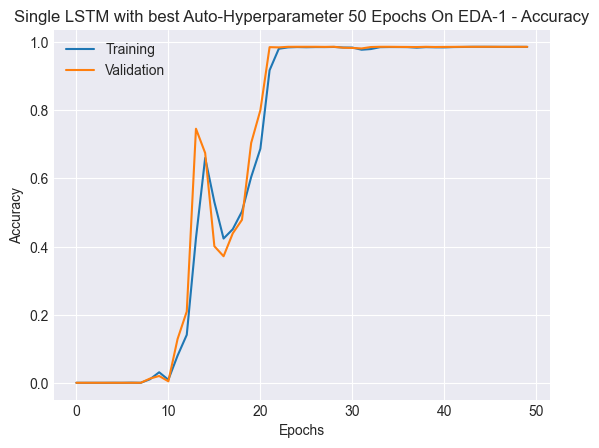

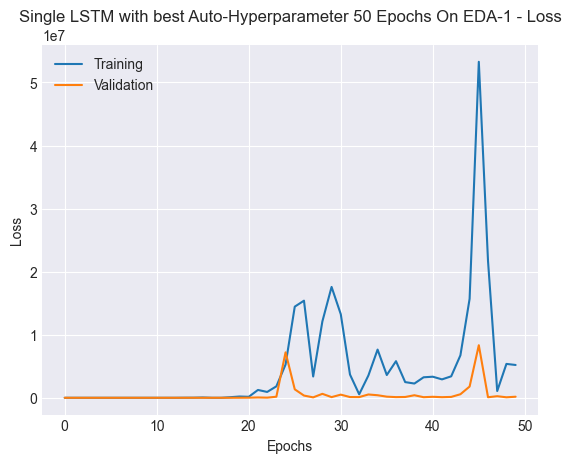

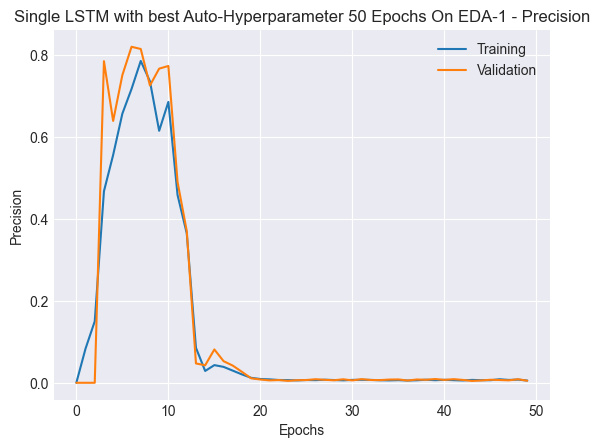

282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9867 - f1_score: 0.0027 - loss: 171837.3438 - precision: 0.0079


<Figure size 640x480 with 0 Axes>

In [14]:
# single lstm model with tuned hyperparamter
hp_lstm_model_50 = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                lstm_units=170,
                                                rate=0.275,
                                                activation="elu",
                                                optimizer="RMSprop",
                                                lr=0.0038393475795542604,
                                                num_class=preprocess.num_intent,
                                                vocab_size=VOCAB_SIZE,
                                                textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
hp_lstm_history_50 = train_lstm.model_history(x=x_train, y=y_train,
                                              x_val=x_val,
                                              y_val=y_val,
                                              path=single_lstm_model_callback,
                                              model=hp_lstm_model_50,
                                              batch_size=96,
                                              epochs=50,
                                              filename="hp_96Batch_50epochs")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_50,
                title="Single LSTM with best Auto-Hyperparameter 50 Epochs On EDA-1",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Single_LSTM"))

# evaluating the model with test dataset
hp_lstm_model_50_evaluate = hp_lstm_model_50.evaluate(
    x=x_test, y=y_test, verbose=1)

##### For 75 Epochs

Epoch 1/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.0000e+00 - f1_score: 0.0033 - loss: 5.0021 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0020 - val_loss: 4.6672 - val_precision: 0.0000e+00
Epoch 2/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.0000e+00 - f1_score: 0.0224 - loss: 4.3886 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0108 - val_loss: 4.3769 - val_precision: 0.0000e+00
Epoch 3/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.0000e+00 - f1_score: 0.0567 - loss: 3.6579 - precision: 0.1162 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0749 - val_loss: 3.2533 - val_precision: 0.0000e+00
Epoch 4/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.0000e+00 - f1_score: 0.1166 - loss: 3.0927 - precision: 0.3837 - val_accuracy: 0.0000e+00 - val_f1_score: 0.1780 - val_loss: 2.7848 - val_precision: 0.3681
Epoch 5/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.0000e+00 - f1_score

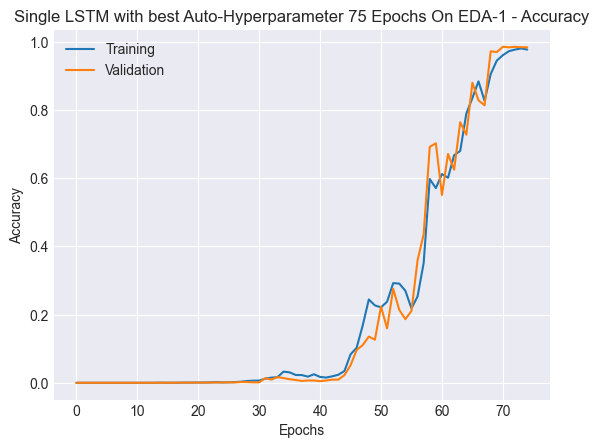

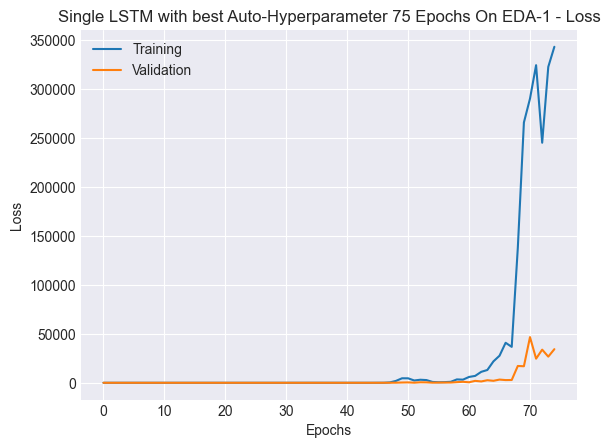

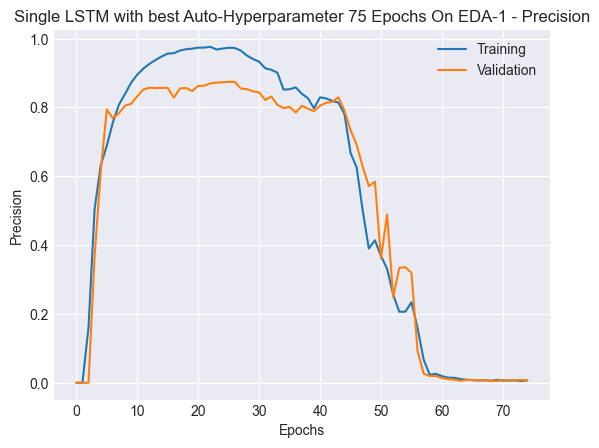

282/282 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.9847 - f1_score: 0.0062 - loss: 34039.8242 - precision: 0.0083


<Figure size 640x480 with 0 Axes>

In [15]:
# single lstm model with tuned hyperparamter
hp_lstm_model_75 = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                lstm_units=170,
                                                rate=0.275,
                                                activation="elu",
                                                optimizer="RMSprop",
                                                lr=0.0038393475795542604,
                                                num_class=preprocess.num_intent,
                                                vocab_size=VOCAB_SIZE,
                                                textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
hp_lstm_history_75 = train_lstm.model_history(x=x_train, y=y_train,
                                              x_val=x_val,
                                              y_val=y_val,
                                              path=single_lstm_model_callback,
                                              model=hp_lstm_model_75,
                                              batch_size=96,
                                              epochs=75,
                                              filename="hp_96Batch_75epochs")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_75,
                title="Single LSTM with best Auto-Hyperparameter 75 Epochs On EDA-1",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Single_LSTM"))

# evaluating the model with test dataset
hp_lstm_model_75_evaluate = hp_lstm_model_75.evaluate(
    x=x_test, y=y_test, verbose=1)

#### Training the Single Layer LSTM Model with Last best Sets of Auto-Hyperparameter on EDA size-1

##### For 30 Epochs

Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.0000e+00 - f1_score: 0.0023 - loss: 5.0169 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0021 - val_loss: 5.0130 - val_precision: 0.0000e+00
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 6.2078e-04 - f1_score: 0.0066 - loss: 6.1961 - precision: 0.5043 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0067 - val_loss: 4.6137 - val_precision: 0.0000e+00
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 6.3998e-06 - f1_score: 0.0236 - loss: 4.3964 - precision: 0.1892 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0437 - val_loss: 3.9358 - val_precision: 0.5882
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 9.0153e-06 - f1_score: 0.0827 - loss: 3.5434 - precision: 0.5379 - val_accuracy: 0.0000e+00 - val_f1_score: 0.1841 - val_loss: 3.1149 - val_precision: 0.9048
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 5.2187e-04 - f1_score: 0.2528 - loss: 2.

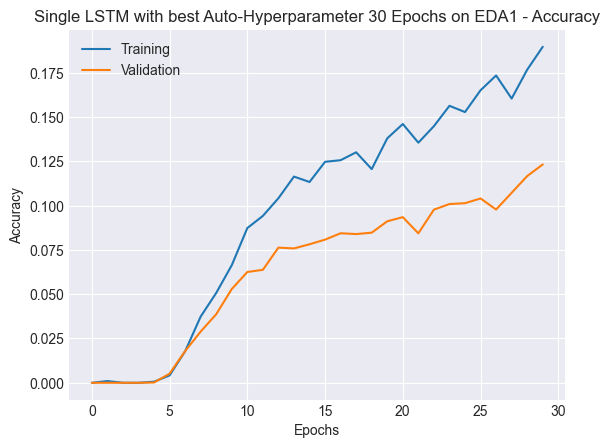

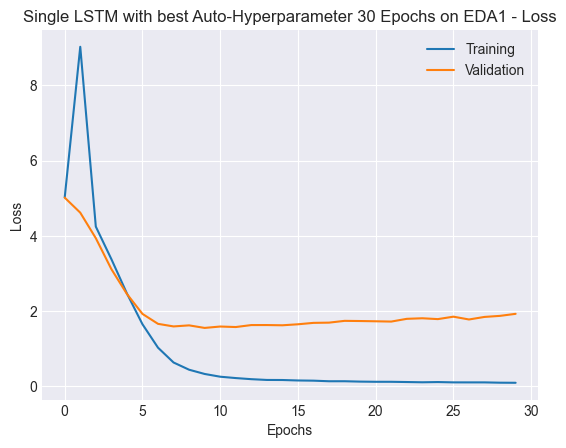

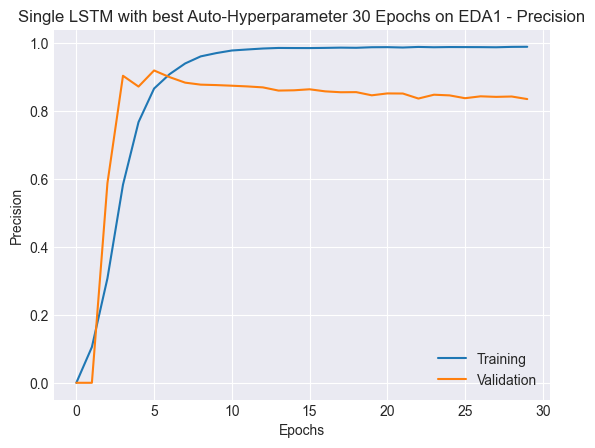

282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1263 - f1_score: 0.7452 - loss: 1.9561 - precision: 0.8318


<Figure size 640x480 with 0 Axes>

In [16]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_30 = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                    lstm_units=35,
                                                    rate=0.275,
                                                    activation="elu",
                                                    optimizer="Nadam",
                                                    lr=0.007121072966581653,
                                                    num_class=preprocess.num_intent,
                                                    vocab_size=VOCAB_SIZE,
                                                    textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_30 = train_lstm.model_history(x=x_train, y=y_train,
                                                  x_val=x_val,
                                                  y_val=y_val,
                                                  path=single_lstm_model_callback,
                                                  model=old_hp_lstm_model_30,
                                                  batch_size=192,
                                                  epochs=30,
                                                  filename="old_hp_192Batch_30epochs_eda1")
# plottiing the mertics
train_lstm.plot(history=old_hp_lstm_history_30,
                title="Single LSTM with best Auto-Hyperparameter 30 Epochs on EDA1",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_lstm_model_30_evaluate = old_hp_lstm_model_30.evaluate(
    x=x_test, y=y_test, verbose=1)

##### For 50 Epochs

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 7.4511e-06 - f1_score: 0.0041 - loss: 4.9839 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0158 - val_loss: 4.2210 - val_precision: 0.0000e+00
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 8.7814e-06 - f1_score: 0.0518 - loss: 3.9392 - precision: 0.4924 - val_accuracy: 0.0000e+00 - val_f1_score: 0.2967 - val_loss: 2.5977 - val_precision: 0.8291
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 1.6571e-04 - f1_score: 0.3964 - loss: 2.1167 - precision: 0.8221 - val_accuracy: 3.7889e-04 - val_f1_score: 0.7076 - val_loss: 1.2940 - val_precision: 0.9025
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.0012 - f1_score: 0.8055 - loss: 0.7423 - precision: 0.9336 - val_accuracy: 0.0015 - val_f1_score: 0.8001 - val_loss: 0.9594 - val_precision: 0.9077
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.0037 - f1_score: 0.9263 - loss: 0.3000 - precision

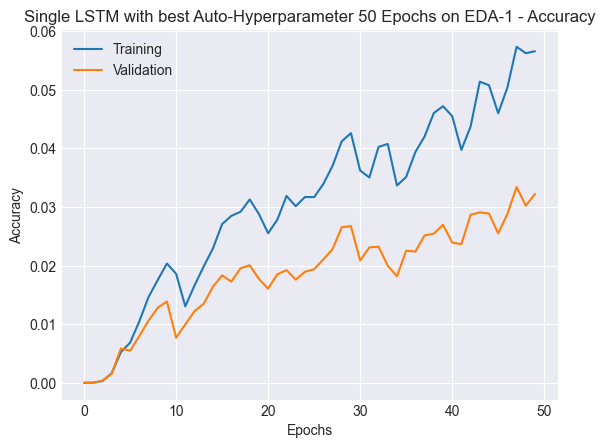

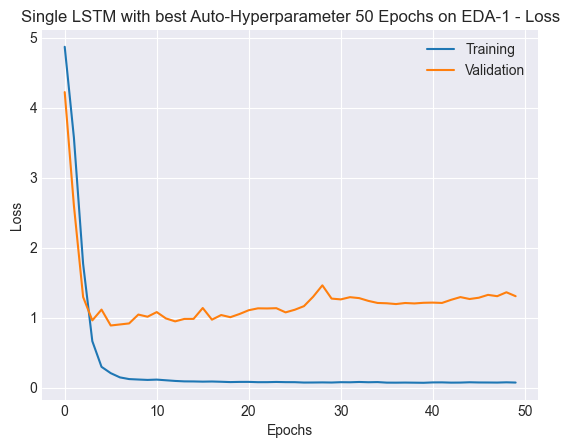

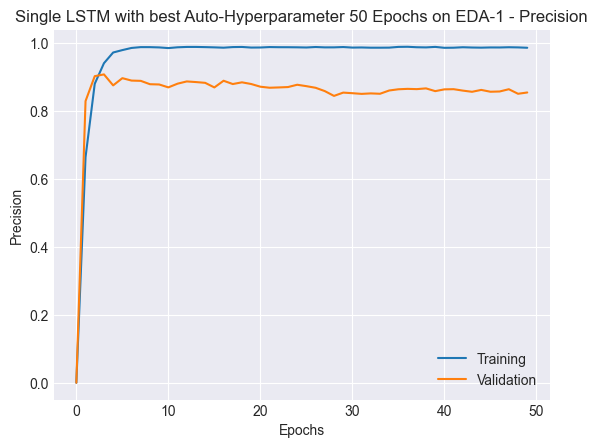

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0321 - f1_score: 0.7887 - loss: 1.4125 - precision: 0.8435


<Figure size 640x480 with 0 Axes>

In [17]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_50 = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                    lstm_units=35,
                                                    rate=0.275,
                                                    activation="elu",
                                                    optimizer="Nadam",
                                                    lr=0.007121072966581653,
                                                    num_class=preprocess.num_intent,
                                                    vocab_size=VOCAB_SIZE,
                                                    textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_50 = train_lstm.model_history(x=x_train, y=y_train,
                                                  x_val=x_val,
                                                  y_val=y_val,
                                                  path=single_lstm_model_callback,
                                                  model=old_hp_lstm_model_50,
                                                  batch_size=192,
                                                  epochs=50,
                                                  filename="old_hp_192Batch_50epochs_eda1")
# plottiing the mertics
train_lstm.plot(history=old_hp_lstm_history_50,
                title="Single LSTM with best Auto-Hyperparameter 50 Epochs on EDA-1",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_lstm_model_50_evaluate = old_hp_lstm_model_50.evaluate(
    x=x_test, y=y_test, verbose=1)

##### For 75 Epochs

Epoch 1/75
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.0000e+00 - f1_score: 0.0028 - loss: 5.0138 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0032 - val_loss: 4.6057 - val_precision: 0.0000e+00
Epoch 2/75
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 2.5075e-07 - f1_score: 0.0341 - loss: 4.3106 - precision: 0.3439 - val_accuracy: 7.7778e-06 - val_f1_score: 0.2416 - val_loss: 2.7845 - val_precision: 0.8555
Epoch 3/75
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 5.9990e-04 - f1_score: 0.3898 - loss: 2.2011 - precision: 0.8578 - val_accuracy: 0.0042 - val_f1_score: 0.6701 - val_loss: 1.4308 - val_precision: 0.9058
Epoch 4/75
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.0116 - f1_score: 0.7733 - loss: 0.8547 - precision: 0.9243 - val_accuracy: 0.0127 - val_f1_score: 0.7687 - val_loss: 1.0904 - val_precision: 0.9009
Epoch 5/75
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.0304 - f1_score: 0.9057 - loss: 0.3934 - precision: 0.

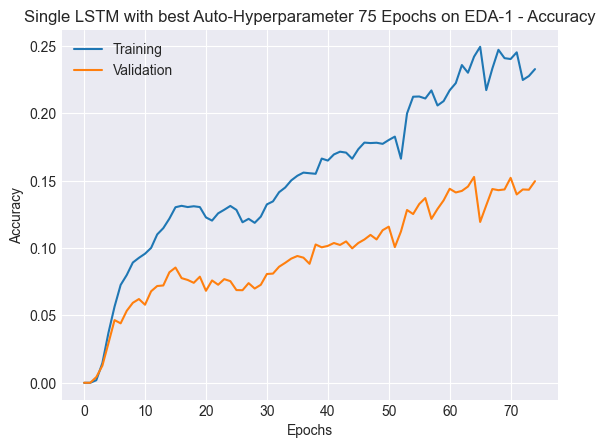

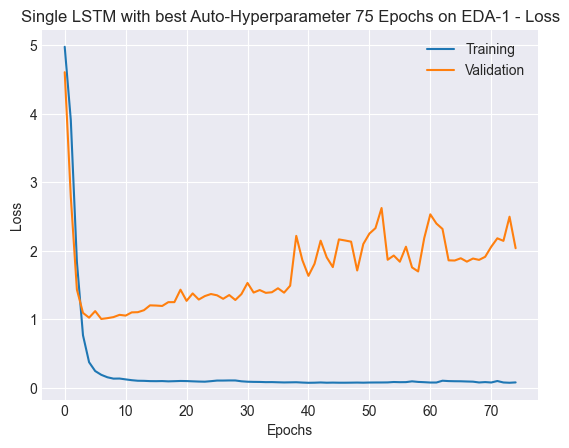

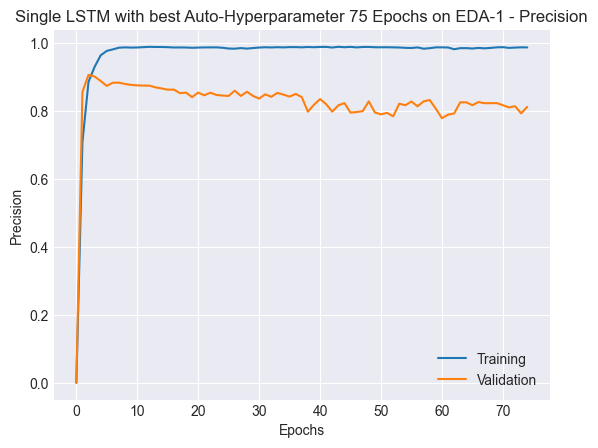

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1479 - f1_score: 0.7584 - loss: 2.2039 - precision: 0.8066


<Figure size 640x480 with 0 Axes>

In [18]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_75 = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                    lstm_units=35,
                                                    rate=0.275,
                                                    activation="elu",
                                                    optimizer="Nadam",
                                                    lr=0.007121072966581653,
                                                    num_class=preprocess.num_intent,
                                                    vocab_size=VOCAB_SIZE,
                                                    textvector_layer=textvector_layer)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_75 = train_lstm.model_history(x=x_train, y=y_train,
                                                  x_val=x_val,
                                                  y_val=y_val,
                                                  path=single_lstm_model_callback,
                                                  model=old_hp_lstm_model_75,
                                                  batch_size=192,
                                                  epochs=75,
                                                  filename="old_hp_192Batch_75epochs_eda1")

train_lstm.plot(history=old_hp_lstm_history_75,
                title="Single LSTM with best Auto-Hyperparameter 75 Epochs on EDA-1",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_lstm_model_75_evaluate = old_hp_lstm_model_75.evaluate(
    x=x_test, y=y_test, verbose=1)

## Size-3

### Exploratory Data Analysis For EDA Size-3 Augmented Data 

The length of the training data:  30000
The length of the testing data:  18000
The length of the validation data:  12000


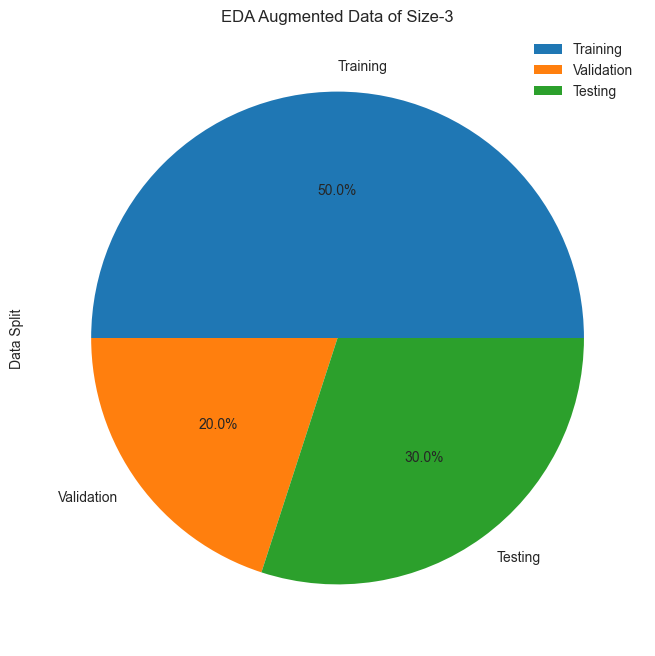

In [20]:
preprocess.records_per_set(train=eda_size_3_train,
                           val=eda_size_3_val,
                           test=eda_size_3_test,
                           title="EDA Augmented Data of Size-3")

##### Training Set - Before Preprocessing

[INFO] Minimum Number of Charaters in a query is:  1
[INFO] Maximum Number of Charaters in a query is:  174


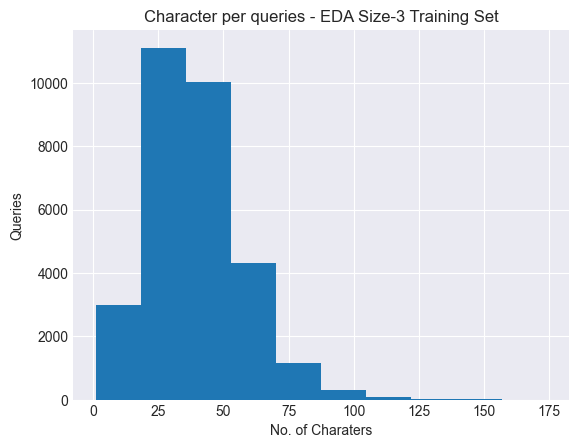

[INFO] Minimum Number of Words in a query is:  1
[INFO] Maximum Number of Words in a query is:  30


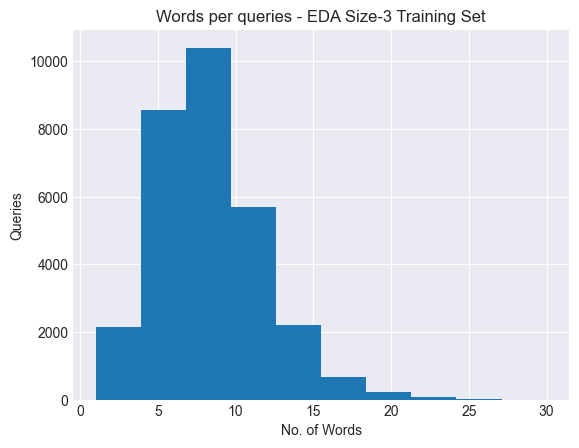

[INFO] Minimum Number of Average Words Length in a query is:  1.0
[INFO] Maximum Number of Average Words Length in a query is:  13.0


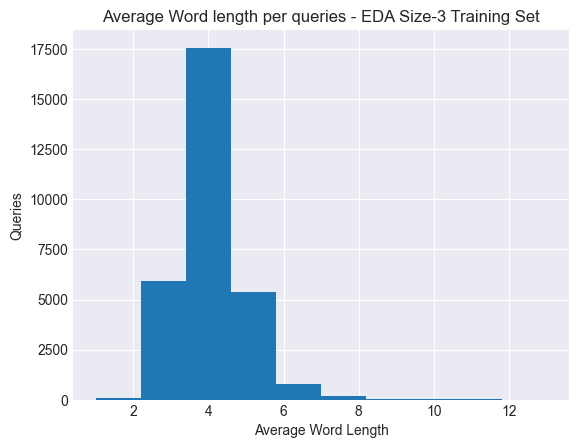


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  7954


In [21]:
# exploring the training data
train_explore_eda3 = preprocess.eda(data=eda_size_3_train,
                               path=os.path.join(augment_plot_path, r"EDA\Before_Preprocessing\Training"))
# plotting number of character per record
train_explore_eda3.char_per_query(title="EDA Size-3 Training Set")
# plotting number of words per record
train_explore_eda3.word_per_query(title="EDA Size-3 Training Set")
# plotting average word length per record
train_explore_eda3.avg_word_len_per_query(title="EDA Size-3 Training Set")
# line graph of word frequency per class
train_word_freq_dict_eda3 = train_explore_eda3.word_freq_per_class(title="EDA Size-3 Training Set")
# worldcloud of word frequency per class
train_worldcloud_dict_eda3 = train_explore_eda3.word_cloud_per_class(
    title="EDA Size-3 Training Set")
# number of unique words
train_num_unique_words_eda3 = train_explore_eda3.vocabulary()
print("\n[INFO] The vocabulary size is: ", train_num_unique_words_eda3)

The length of the queries is the tarining set is not long. Most queries has in 5 to 10 words, highest beign 25.

##### Validation Set - Before Preprocessing

[INFO] Minimum Number of Charaters in a query is:  1
[INFO] Maximum Number of Charaters in a query is:  140


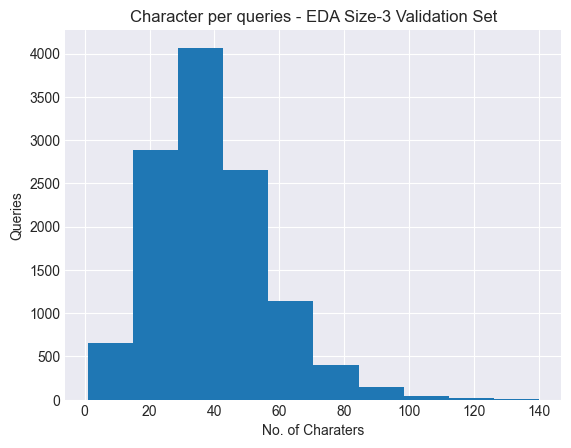

[INFO] Minimum Number of Words in a query is:  1
[INFO] Maximum Number of Words in a query is:  27


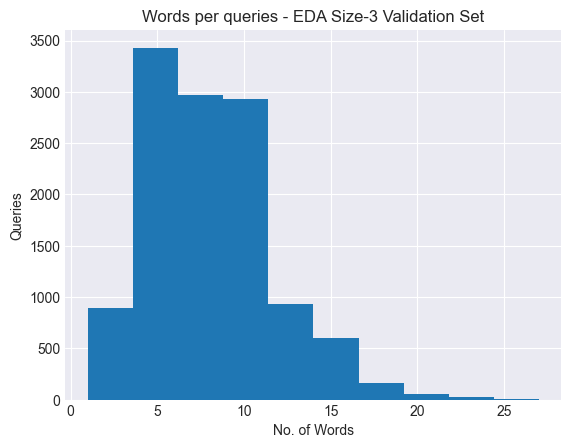

[INFO] Minimum Number of Average Words Length in a query is:  1.0
[INFO] Maximum Number of Average Words Length in a query is:  11.0


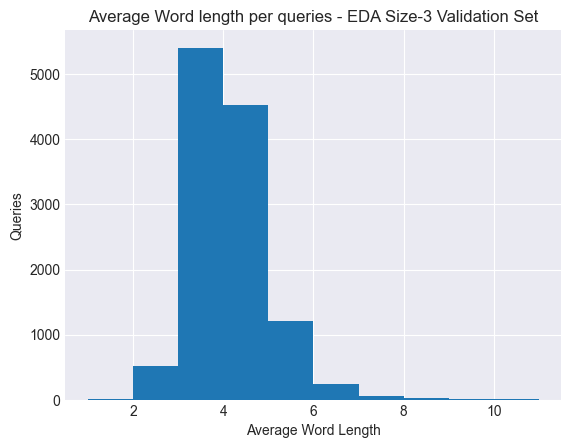


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  5802


In [22]:
# exploring the validation data
val_explore_eda3 = preprocess.eda(data=eda_size_3_val,
                             path=os.path.join(augment_plot_path, r"EDA\Before_Preprocessing\Validation"))
# plotting number of character per record
val_explore_eda3.char_per_query(title="EDA Size-3 Validation Set")
# plotting number of words per record
val_explore_eda3.word_per_query(title="EDA Size-3 Validation Set")
# plotting average word length per record
val_explore_eda3.avg_word_len_per_query(title="EDA Size-3 Validation Set")
# line graph of word frequency per class
val_word_freq_dict_eda3 = val_explore_eda3.word_freq_per_class(title="EDA Size-3 Validation Set")
# worldcloud of word frequency per class
val_worldcloud_dict_eda3 = val_explore_eda3.word_cloud_per_class(
    title="EDA Size-3 Validation Set")
# number of unique words
val_num_unique_words_eda3 = val_explore_eda3.vocabulary()
print("\n[INFO] The vocabulary size is: ", val_num_unique_words_eda3)

The average word

##### Testing Set - Before Preprocessing

[INFO] Minimum Number of Charaters in a query is:  1
[INFO] Maximum Number of Charaters in a query is:  153


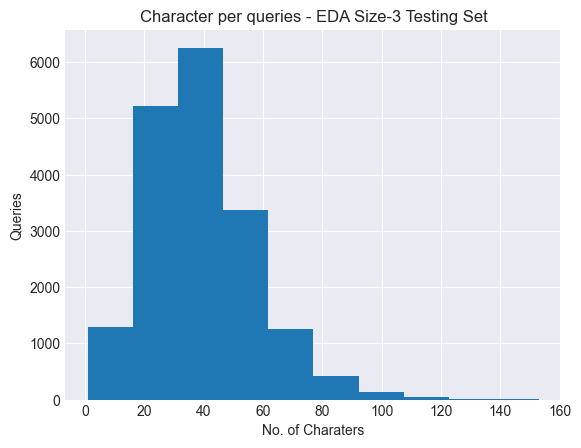

[INFO] Minimum Number of Words in a query is:  1
[INFO] Maximum Number of Words in a query is:  28


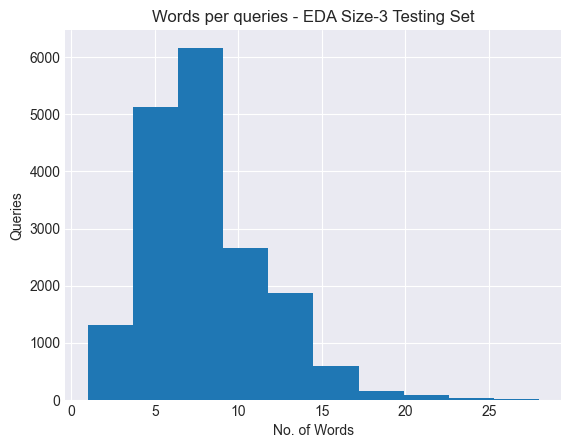

[INFO] Minimum Number of Average Words Length in a query is:  1.0
[INFO] Maximum Number of Average Words Length in a query is:  12.0


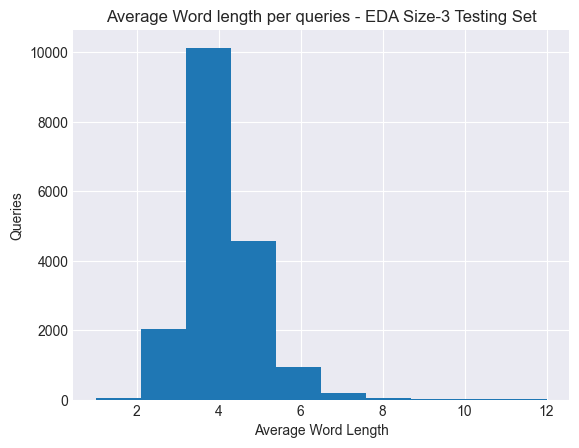


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  6848


In [23]:
# exploring the testing data
test_explore_eda3 = preprocess.eda(data=eda_size_3_test,
                              path=os.path.join(augment_plot_path, r"EDA\Before_Preprocessing\Testing"))
# plotting number of character per record
test_explore_eda3.char_per_query(title="EDA Size-3 Testing Set")
# plotting number of words per record
test_explore_eda3.word_per_query(title="EDA Size-3 Testing Set")
# plotting average word length per record
test_explore_eda3.avg_word_len_per_query(title="EDA Size-3 Testing Set")
# line graph of word frequency per class
test_word_freq_dict_eda3 = test_explore_eda3.word_freq_per_class(title="EDA Size-3 Testing Set")
# worldcloud of word frequency per class
test_worldcloud_dict_eda3 = test_explore_eda3.word_cloud_per_class(title="EDA Size-3 Testing Set")
# number of unique words
test_num_unique_words_eda3 = test_explore_eda3.vocabulary()
print("\n[INFO] The vocabulary size is: ", test_num_unique_words_eda3)

### Preprocessing the EDA Size-3 Augmented Data 

In [19]:
# preprocessing the training set
train_preprocess_eda3 = preprocess.pre_process(eda_size_3_train)
x_train_eda3 = train_preprocess_eda3.preprocess()
# lemmentizing the preprocessed data
x_train_eda3 = train_preprocess_eda3.lemmatise()

# encoding the classes to one-hot format
y_train_eda3 = train_preprocess_eda3.encode_class()

In [20]:
# preprocessing the validation set
val_preprocess_eda3 = preprocess.pre_process(eda_size_3_val)
x_val_eda3 = val_preprocess_eda3.preprocess()
# lemmentizing the preprocessed data
x_val_eda3 = val_preprocess_eda3.lemmatise()

# encoding the classes to one-hot format
y_val_eda3 = val_preprocess_eda3.encode_class()

In [21]:
# preprocessing the testing set
test_preprocess_eda3 = preprocess.pre_process(eda_size_3_test)
x_test_eda3 = test_preprocess_eda3.preprocess()
# lemmentizing the preprocessed data
x_test_eda3 = test_preprocess_eda3.lemmatise()

# encoding the classes to one-hot format
y_test_eda3 = test_preprocess_eda3.encode_class()

### Exploring the Processed EDA Size-3 Augmented Datasets

##### Training Set

[INFO] Minimum Number of Charaters in a query is:  0
[INFO] Maximum Number of Charaters in a query is:  105


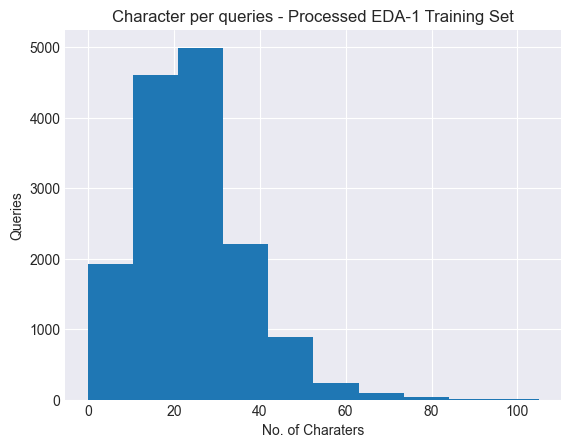

[INFO] Minimum Number of Words in a query is:  0
[INFO] Maximum Number of Words in a query is:  16


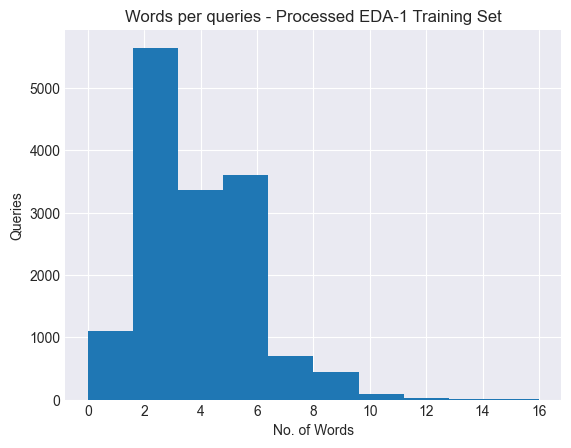

c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[INFO] Minimum Number of Average Words Length in a query is:  1.0
[INFO] Maximum Number of Average Words Length in a query is:  13.0


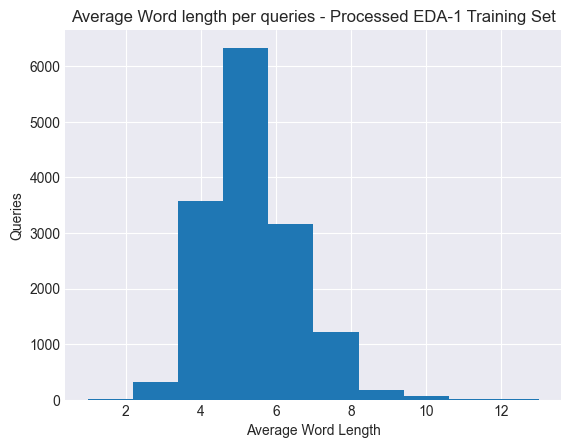


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  4954


In [ ]:
# creating processed training dataframe
processed_train_df_eda3 = pd.DataFrame(({"Query": x_train_eda3,
                                    "Intent": eda_size_3_train.iloc[:, 1]}))
# exploring the processed training data
processed_train_explore_eda3 = preprocess.eda(data=processed_train_df_eda3,
                                         path=os.path.join(augment_plot_path, r"EDA\Preprocessed\Training"))
# plotting number of character per record
processed_train_explore_eda3.char_per_query(title="Processed EDA-3 Training Set")
# plotting number of words per record
processed_train_explore_eda3.word_per_query(title="Processed EDA-3 Training Set")
# plotting average word length per record
processed_train_explore_eda3.avg_word_len_per_query(title="Processed EDA-3 Training Set")
# line graph of word frequency per class
processed_train_word_freq_dict_eda3 = processed_train_explore_eda3.word_freq_per_class(
    title="Processed EDA-3 Training Set")
# worldcloud of word frequency per class
processed_train_worldcloud_dict_eda3 = processed_train_explore_eda3.word_cloud_per_class(
    title="Processed EDA-3 Training Set")
# number of unique words
processed_train_num_unique_words_eda3 = processed_train_explore_eda3.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_train_num_unique_words_eda3)

##### Validation Set

[INFO] Minimum Number of Charaters in a query is:  0
[INFO] Maximum Number of Charaters in a query is:  99


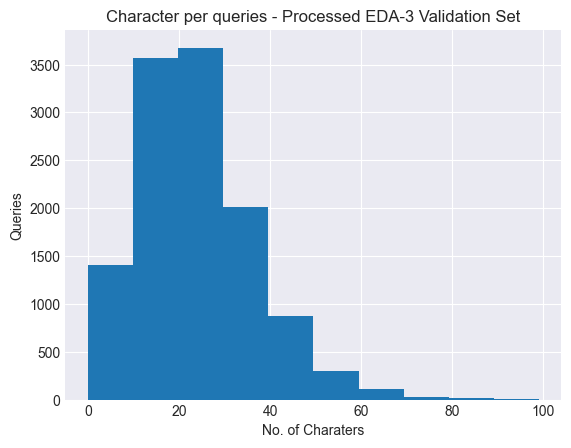

[INFO] Minimum Number of Words in a query is:  0
[INFO] Maximum Number of Words in a query is:  15


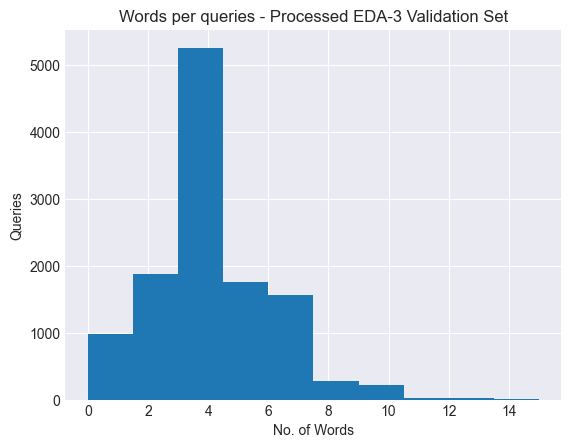

[INFO] Minimum Number of Average Words Length in a query is:  1.0
[INFO] Maximum Number of Average Words Length in a query is:  13.0


c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


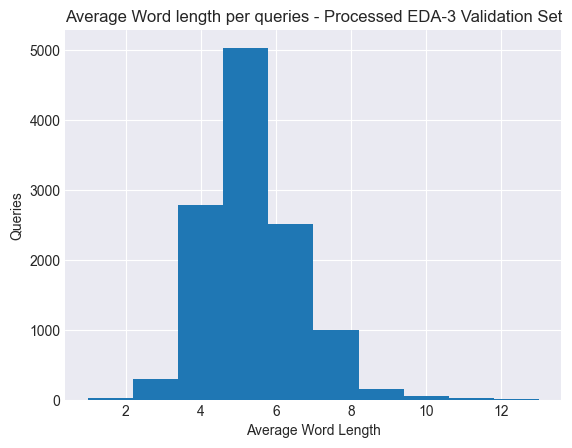


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  4675


In [27]:
# creating processed validation dataframe
processed_val_df_eda3 = pd.DataFrame(({"Query": x_val_eda3,
                                       "Intent": eda_size_3_val.iloc[:, 1]}))
# exploring the processed validation data
processed_val_explore_eda3 = preprocess.eda(data=processed_val_df_eda3,
                                            path=os.path.join(augment_plot_path, r"EDA\Preprocessed\Validation"))
# plotting number of character per record
processed_val_explore_eda3.char_per_query(
    title="Processed EDA-3 Validation Set")
# plotting number of words per record
processed_val_explore_eda3.word_per_query(
    title="Processed EDA-3 Validation Set")
# plotting average word length per record
processed_val_explore_eda3.avg_word_len_per_query(
    title="Processed EDA-3 Validation Set")
# line graph of word frequency per class
processed_val_word_freq_dict_eda3 = processed_val_explore_eda3.word_freq_per_class(
    title="Processed EDA-3 Validation Set")
# worldcloud of word frequency per class
processed_val_worldcloud_dict_eda3 = processed_val_explore_eda3.word_cloud_per_class(
    title="Processed EDA-3 Validation Set")
# number of unique words
processed_val_num_unique_words_eda3 = processed_val_explore_eda3.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_val_num_unique_words_eda3)

##### Testing Set

[INFO] Minimum Number of Charaters in a query is:  0
[INFO] Maximum Number of Charaters in a query is:  129


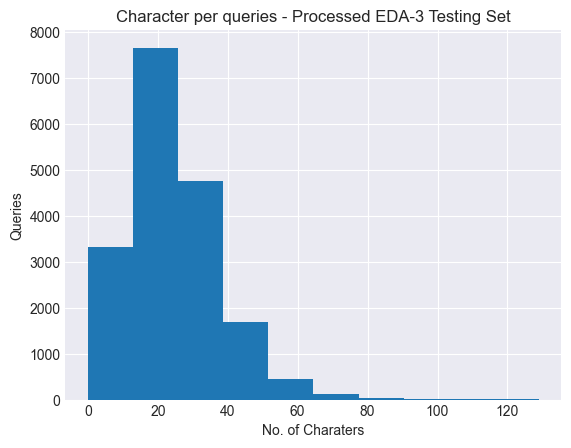

[INFO] Minimum Number of Words in a query is:  0
[INFO] Maximum Number of Words in a query is:  19


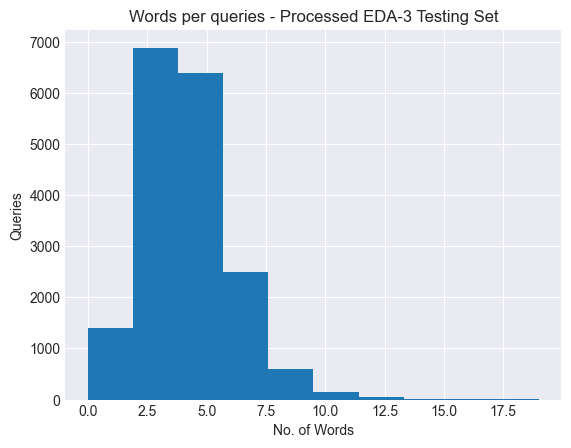

c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[INFO] Minimum Number of Average Words Length in a query is:  1.0
[INFO] Maximum Number of Average Words Length in a query is:  14.0


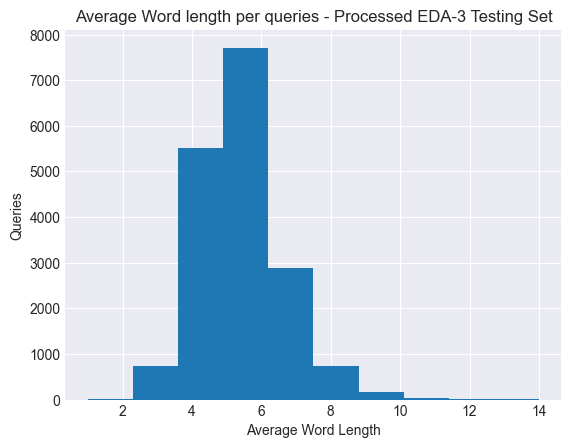


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  5505


In [28]:
# creating processed testing dataframe
processed_test_df_eda3 = pd.DataFrame(({"Query": x_test_eda3,
                                   "Intent": eda_size_3_test.iloc[:, 1]}))
# exploring the processed testing data
processed_test_explore_eda3 = preprocess.eda(data=processed_test_df_eda3,
                                        path=os.path.join(augment_plot_path, r"EDA\Preprocessed\Testing"))
# plotting number of character per record
processed_test_explore_eda3.char_per_query(title="Processed EDA-3 Testing Set")
# plotting number of words per record
processed_test_explore_eda3.word_per_query(title="Processed EDA-3 Testing Set")
# plotting average word length per record
processed_test_explore_eda3.avg_word_len_per_query(title="Processed EDA-3 Testing Set")
# line graph of word frequency per class
processed_test_word_freq_dict_eda3 = processed_test_explore_eda3.word_freq_per_class(
    title="Processed EDA-3 Testing Set")
# worldcloud of word frequency per class
processed_test_worldcloud_dict_eda3 = processed_test_explore_eda3.word_cloud_per_class(
    title="Processed EDA-3 Testing Set")
# number of unique words
processed_test_num_unique_words_eda3 = processed_test_explore_eda3.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_test_num_unique_words_eda3)

### Creating a textvectorization layer using Keras

In [22]:
# creating a keras text vector layer
textvector_layer_eda3 = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE,
                                                     ngrams=(1, 2, 3),
                                                     output_mode="int",
                                                     output_sequence_length=SEQ_LEN)
# learning the vocabulary in the dataset from training data
textvector_layer_eda3.adapt(x_train_eda3)

### Single-LSTM

#### Training the Single Layer LSTM Model with best Auto-Hyperparameter on EDA size-3

##### For 30 Epochs

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 1.3397e-05 - f1_score: 0.0063 - loss: 4.9090 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0042 - val_loss: 4.1411 - val_precision: 0.0000e+00
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.0000e+00 - f1_score: 0.0348 - loss: 3.9891 - precision: 0.1820 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0578 - val_loss: 3.4716 - val_precision: 0.0809
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 1.6869e-05 - f1_score: 0.1335 - loss: 3.0922 - precision: 0.4843 - val_accuracy: 0.0000e+00 - val_f1_score: 0.3535 - val_loss: 2.2551 - val_precision: 0.7153
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 4.8588e-05 - f1_score: 0.3708 - loss: 2.1601 - precision: 0.6982 - val_accuracy: 0.0000e+00 - val_f1_score: 0.5799 - val_loss: 1.5660 - val_precision: 0.8721
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 3.0574e-04 - f1_score: 0.5654 

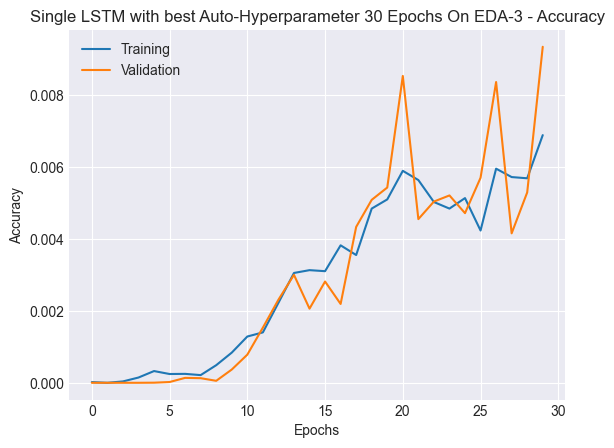

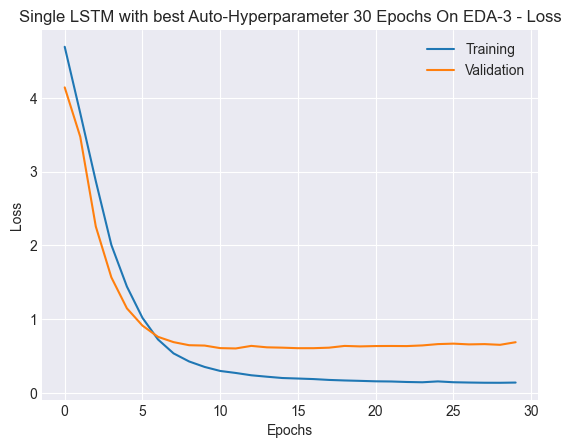

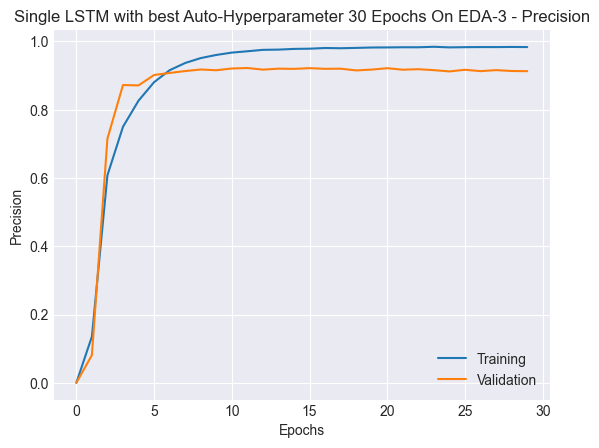

563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0094 - f1_score: 0.8682 - loss: 0.7183 - precision: 0.9052


<Figure size 640x480 with 0 Axes>

In [23]:
# single lstm model with tuned hyperparamter
hp_lstm_model_30_eda3 = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                     lstm_units=170,
                                                     rate=0.275,
                                                     activation="elu",
                                                     optimizer="RMSprop",
                                                     lr=0.0038393475795542604,
                                                     num_class=preprocess.num_intent,
                                                     vocab_size=VOCAB_SIZE,
                                                     textvector_layer=textvector_layer_eda3)

# fitting the single lstm model to full original dataset
hp_lstm_history_30_eda3 = train_lstm.model_history(x=x_train_eda3, y=y_train_eda3,
                                                   x_val=x_val_eda3,
                                                   y_val=y_val_eda3,
                                                   path=single_lstm_model_callback,
                                                   model=hp_lstm_model_30_eda3,
                                                   batch_size=96,
                                                   epochs=30,
                                                   filename="hp_96Batch_30epochs_eda3")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_30_eda3,
                title="Single LSTM with best Auto-Hyperparameter 30 Epochs On EDA-3",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Single_LSTM"))

# evaluating the model with test dataset
hp_lstm_model_30_evaluate_eda3 = hp_lstm_model_30_eda3.evaluate(
    x=x_test_eda3, y=y_test_eda3, verbose=1)

##### For 50 Epochs

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.0000e+00 - f1_score: 0.0059 - loss: 4.9406 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0074 - val_loss: 4.1083 - val_precision: 0.0000e+00
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.0000e+00 - f1_score: 0.0389 - loss: 3.9748 - precision: 0.2933 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0896 - val_loss: 3.2069 - val_precision: 0.7042
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.0000e+00 - f1_score: 0.1648 - loss: 2.9607 - precision: 0.5529 - val_accuracy: 0.0000e+00 - val_f1_score: 0.3895 - val_loss: 2.1348 - val_precision: 0.8013
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 4.1615e-05 - f1_score: 0.4026 - loss: 2.0509 - precision: 0.7373 - val_accuracy: 0.0000e+00 - val_f1_score: 0.6174 - val_loss: 1.4618 - val_precision: 0.8505
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 6.7450e-05 - f1_score: 0.6164 

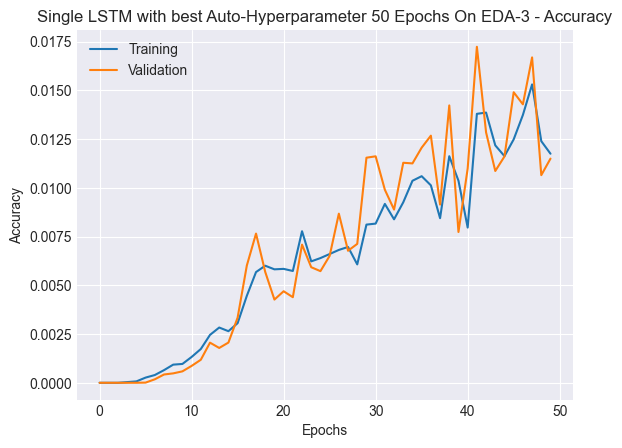

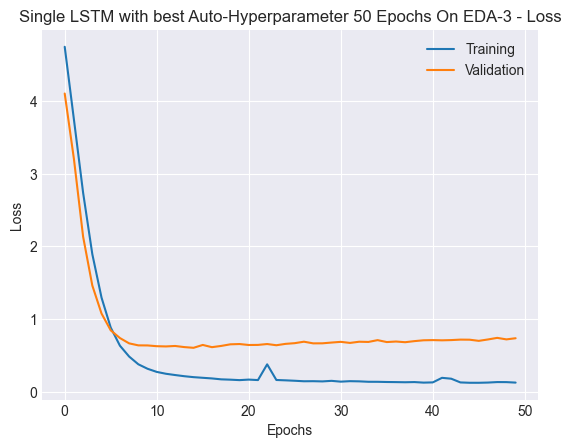

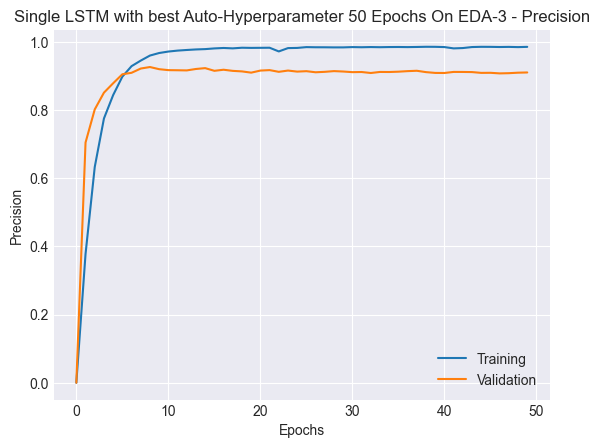

563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0113 - f1_score: 0.8669 - loss: 0.7786 - precision: 0.8998


<Figure size 640x480 with 0 Axes>

In [24]:
# single lstm model with tuned hyperparamter
hp_lstm_model_50_eda3 = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                lstm_units=170,
                                                rate=0.275,
                                                activation="elu",
                                                optimizer="RMSprop",
                                                lr=0.0038393475795542604,
                                                num_class=preprocess.num_intent,
                                                vocab_size=VOCAB_SIZE,
                                                textvector_layer=textvector_layer_eda3)

# fitting the single lstm model to full original dataset
hp_lstm_history_50_eda3 = train_lstm.model_history(x=x_train_eda3, y=y_train_eda3,
                                              x_val=x_val_eda3,
                                              y_val=y_val_eda3,
                                              path=single_lstm_model_callback,
                                              model=hp_lstm_model_50_eda3,
                                              batch_size=96,
                                              epochs=50,
                                              filename="hp_96Batch_50epochs_eda3")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_50_eda3,
                title="Single LSTM with best Auto-Hyperparameter 50 Epochs On EDA-3",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Single_LSTM"))

# evaluating the model with test dataset
hp_lstm_model_50_evaluate_eda3 = hp_lstm_model_50_eda3.evaluate(
    x=x_test_eda3, y=y_test_eda3, verbose=1)

##### For 75 Epochs

Epoch 1/75
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.0000e+00 - f1_score: 0.0085 - loss: 4.8601 - precision: 0.0225 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0275 - val_loss: 3.8572 - val_precision: 0.0000e+00
Epoch 2/75
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 1.4570e-07 - f1_score: 0.0728 - loss: 3.6327 - precision: 0.2138 - val_accuracy: 0.0000e+00 - val_f1_score: 0.1749 - val_loss: 2.7997 - val_precision: 0.5379
Epoch 3/75
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 4.2808e-06 - f1_score: 0.2561 - loss: 2.5676 - precision: 0.5805 - val_accuracy: 0.0000e+00 - val_f1_score: 0.4492 - val_loss: 1.9138 - val_precision: 0.7609
Epoch 4/75
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 5.6483e-05 - f1_score: 0.4826 - loss: 1.7973 - precision: 0.7380 - val_accuracy: 9.8889e-05 - val_f1_score: 0.6589 - val_loss: 1.3104 - val_precision: 0.8522
Epoch 5/75
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 9.3757e-05 - f1_score: 0.6423 - lo

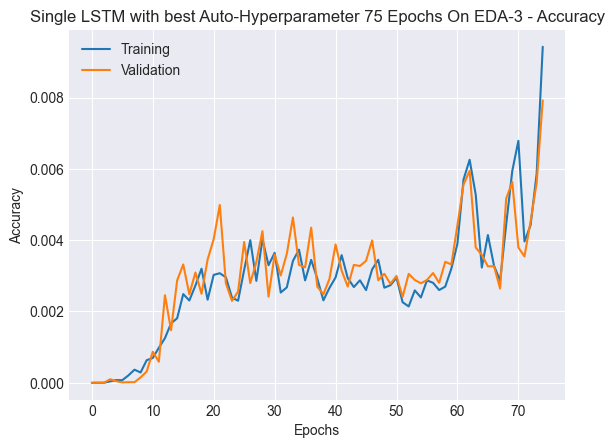

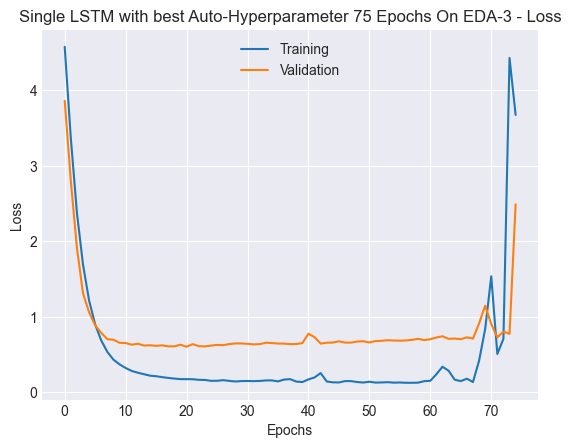

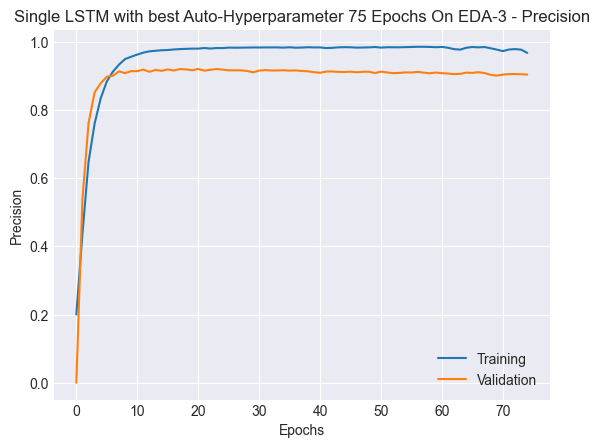

563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0066 - f1_score: 0.8597 - loss: 1.5389 - precision: 0.8940


<Figure size 640x480 with 0 Axes>

In [25]:
# single lstm model with tuned hyperparamter
hp_lstm_model_75_eda3 = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                lstm_units=170,
                                                rate=0.275,
                                                activation="elu",
                                                optimizer="RMSprop",
                                                lr=0.0038393475795542604,
                                                num_class=preprocess.num_intent,
                                                vocab_size=VOCAB_SIZE,
                                                textvector_layer=textvector_layer_eda3)

# fitting the single lstm model to full original dataset
hp_lstm_history_75_eda3 = train_lstm.model_history(x=x_train_eda3, y=y_train_eda3,
                                              x_val=x_val_eda3,
                                              y_val=y_val_eda3,
                                              path=single_lstm_model_callback,
                                              model=hp_lstm_model_75_eda3,
                                              batch_size=96,
                                              epochs=75,
                                              filename="hp_96Batch_75epochs_eda3")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_75_eda3,
                title="Single LSTM with best Auto-Hyperparameter 75 Epochs On EDA-3",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Single_LSTM"))

# evaluating the model with test dataset
hp_lstm_model_75_evaluate_eda3 = hp_lstm_model_75_eda3.evaluate(
    x=x_test_eda3, y=y_test_eda3, verbose=1)

#### Training the Single Layer LSTM Model with Last best Sets of Auto-Hyperparameter on EDA size-3

##### For 30 Epochs

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - accuracy: 0.0000e+00 - f1_score: 0.0083 - loss: 4.8608 - precision: 0.1163 - val_accuracy: 1.1667e-05 - val_f1_score: 0.1124 - val_loss: 3.3616 - val_precision: 0.6000
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 2.9270e-04 - f1_score: 0.3052 - loss: 2.7076 - precision: 0.7986 - val_accuracy: 0.0011 - val_f1_score: 0.7618 - val_loss: 1.0474 - val_precision: 0.9204
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.0038 - f1_score: 0.8286 - loss: 0.6972 - precision: 0.9387 - val_accuracy: 0.0066 - val_f1_score: 0.8397 - val_loss: 0.7297 - val_precision: 0.9307
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.0123 - f1_score: 0.9238 - loss: 0.3262 - precision: 0.9688 - val_accuracy: 0.0162 - val_f1_score: 0.8537 - val_loss: 0.6905 - val_precision: 0.9190
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.0241 - f1_score: 0.9480 - loss: 0.2228 - precision: 0.97

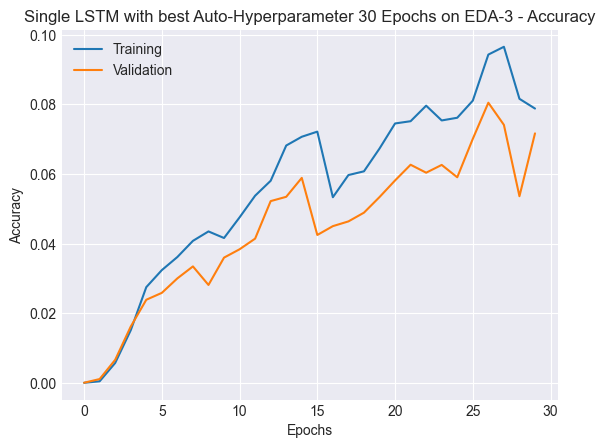

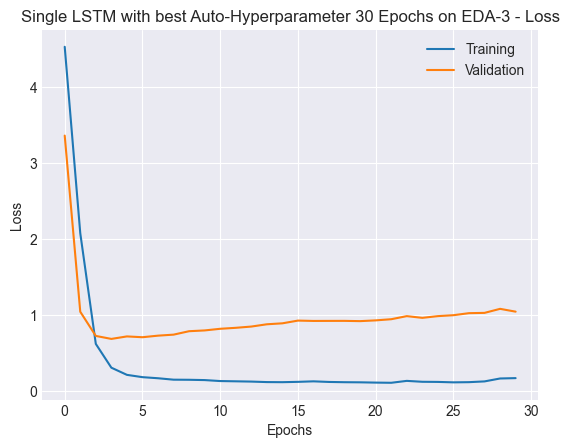

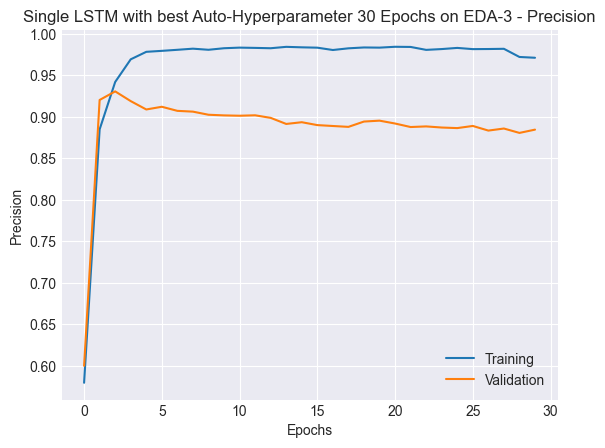

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0724 - f1_score: 0.8278 - loss: 1.1669 - precision: 0.8718


<Figure size 640x480 with 0 Axes>

In [26]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_30_eda3 = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                    lstm_units=35,
                                                    rate=0.275,
                                                    activation="elu",
                                                    optimizer="Nadam",
                                                    lr=0.007121072966581653,
                                                    num_class=preprocess.num_intent,
                                                    vocab_size=VOCAB_SIZE,
                                                    textvector_layer=textvector_layer_eda3)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_30_eda3 = train_lstm.model_history(x=x_train_eda3, y=y_train_eda3,
                                                  x_val=x_val_eda3,
                                                  y_val=y_val_eda3,
                                                  path=single_lstm_model_callback,
                                                  model=old_hp_lstm_model_30_eda3,
                                                  batch_size=192,
                                                  epochs=30,
                                                  filename="old_hp_192Batch_30epochs_eda3")
# plottiing the mertics
train_lstm.plot(history=old_hp_lstm_history_30_eda3,
                title="Single LSTM with best Auto-Hyperparameter 30 Epochs on EDA-3",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_lstm_model_30_evaluate_eda3 = old_hp_lstm_model_30_eda3.evaluate(
    x=x_test_eda3, y=y_test_eda3, verbose=1)

##### For 50 Epochs

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 9.4243e-06 - f1_score: 0.0146 - loss: 4.7421 - precision: 0.2011 - val_accuracy: 1.6111e-05 - val_f1_score: 0.1939 - val_loss: 2.8758 - val_precision: 0.8414
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 4.7136e-04 - f1_score: 0.4028 - loss: 2.2116 - precision: 0.8374 - val_accuracy: 0.0021 - val_f1_score: 0.8076 - val_loss: 0.8876 - val_precision: 0.9339
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.0065 - f1_score: 0.8674 - loss: 0.5507 - precision: 0.9495 - val_accuracy: 0.0072 - val_f1_score: 0.8573 - val_loss: 0.6476 - val_precision: 0.9306
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.0130 - f1_score: 0.9386 - loss: 0.2677 - precision: 0.9754 - val_accuracy: 0.0116 - val_f1_score: 0.8628 - val_loss: 0.6367 - val_precision: 0.9249
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.0173 - f1_score: 0.9466 - loss: 0.2118 - precision: 0.97

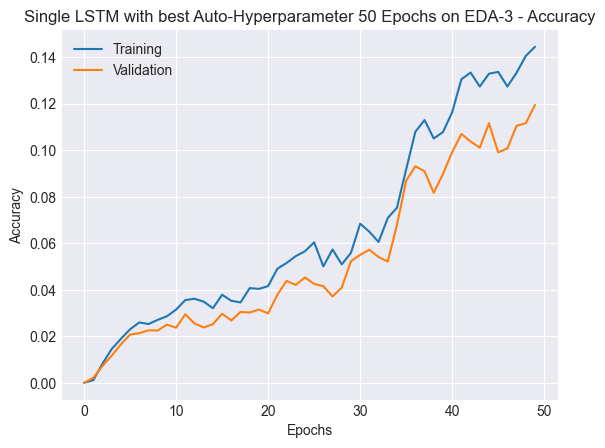

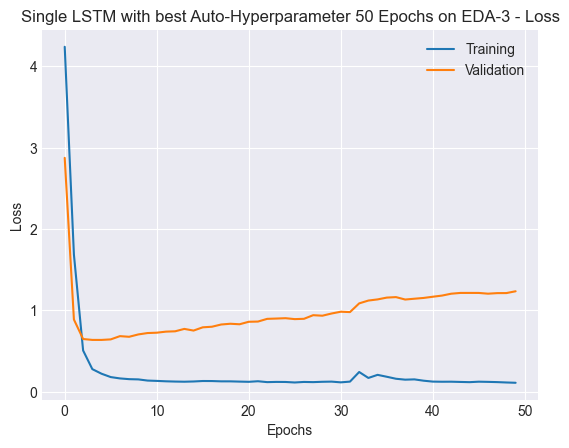

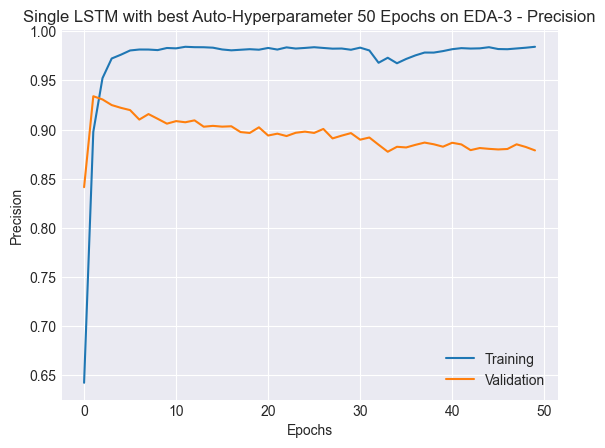

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1186 - f1_score: 0.8332 - loss: 1.3395 - precision: 0.8720


<Figure size 640x480 with 0 Axes>

In [27]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_50_eda3 = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                    lstm_units=35,
                                                    rate=0.275,
                                                    activation="elu",
                                                    optimizer="Nadam",
                                                    lr=0.007121072966581653,
                                                    num_class=preprocess.num_intent,
                                                    vocab_size=VOCAB_SIZE,
                                                    textvector_layer=textvector_layer_eda3)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_50_eda3 = train_lstm.model_history(x=x_train_eda3, y=y_train_eda3,
                                                  x_val=x_val_eda3,
                                                  y_val=y_val_eda3,
                                                  path=single_lstm_model_callback,
                                                  model=old_hp_lstm_model_50_eda3,
                                                  batch_size=192,
                                                  epochs=50,
                                                  filename="old_hp_192Batch_50epochs_eda3")
# plottiing the mertics
train_lstm.plot(history=old_hp_lstm_history_50_eda3,
                title="Single LSTM with best Auto-Hyperparameter 50 Epochs on EDA-3",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_lstm_model_50_evaluate_eda3 = old_hp_lstm_model_50_eda3.evaluate(
    x=x_test_eda3, y=y_test_eda3, verbose=1)

##### For 75 Epochs

Epoch 1/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 4.2514e-08 - f1_score: 0.0090 - loss: 4.8217 - precision: 0.1292 - val_accuracy: 0.0000e+00 - val_f1_score: 0.1580 - val_loss: 3.1462 - val_precision: 0.7709
Epoch 2/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 8.0643e-05 - f1_score: 0.3772 - loss: 2.3616 - precision: 0.8264 - val_accuracy: 0.0010 - val_f1_score: 0.7961 - val_loss: 0.8869 - val_precision: 0.9174
Epoch 3/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.0032 - f1_score: 0.8616 - loss: 0.5620 - precision: 0.9490 - val_accuracy: 0.0056 - val_f1_score: 0.8530 - val_loss: 0.6549 - val_precision: 0.9287
Epoch 4/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.0090 - f1_score: 0.9331 - loss: 0.2824 - precision: 0.9745 - val_accuracy: 0.0122 - val_f1_score: 0.8596 - val_loss: 0.6408 - val_precision: 0.9207
Epoch 5/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.0168 - f1_score: 0.9492 - loss: 0.2039 - precision: 0.97

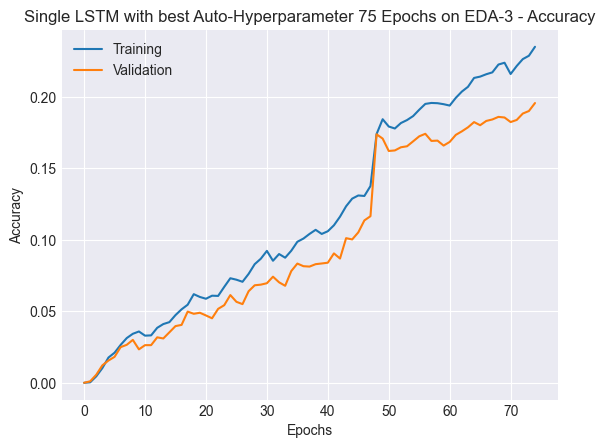

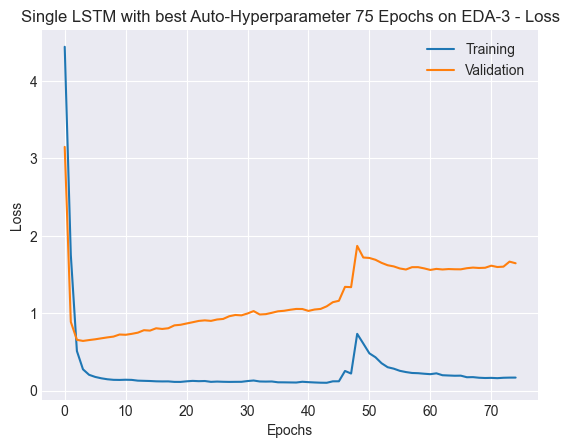

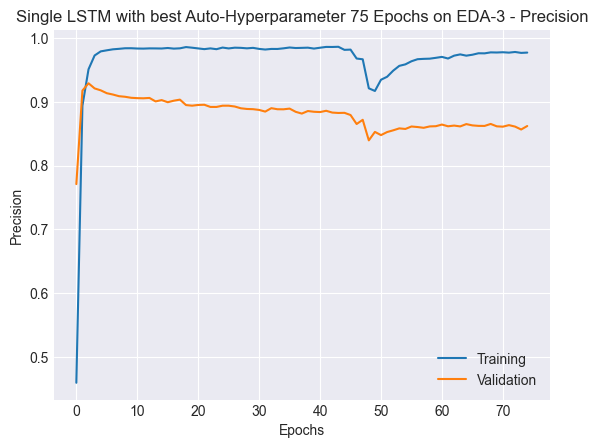

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1965 - f1_score: 0.8081 - loss: 1.8067 - precision: 0.8536


<Figure size 640x480 with 0 Axes>

In [28]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_75_eda3 = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                    lstm_units=35,
                                                    rate=0.275,
                                                    activation="elu",
                                                    optimizer="Nadam",
                                                    lr=0.007121072966581653,
                                                    num_class=preprocess.num_intent,
                                                    vocab_size=VOCAB_SIZE,
                                                    textvector_layer=textvector_layer_eda3)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_75_eda3 = train_lstm.model_history(x=x_train_eda3, y=y_train_eda3,
                                                  x_val=x_val_eda3,
                                                  y_val=y_val_eda3,
                                                  path=single_lstm_model_callback,
                                                  model=old_hp_lstm_model_75_eda3,
                                                  batch_size=192,
                                                  epochs=75,
                                                  filename="old_hp_192Batch_75epochs_eda3")

train_lstm.plot(history=old_hp_lstm_history_75_eda3,
                title="Single LSTM with best Auto-Hyperparameter 75 Epochs on EDA-3",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_lstm_model_75_evaluate_eda3 = old_hp_lstm_model_75_eda3.evaluate(
    x=x_test_eda3, y=y_test_eda3, verbose=1)

## Size-5

### Exploratory Data Analysis For EDA Size-5 Augmented Data 

The length of the training data:  45000
The length of the testing data:  27000
The length of the validation data:  18000


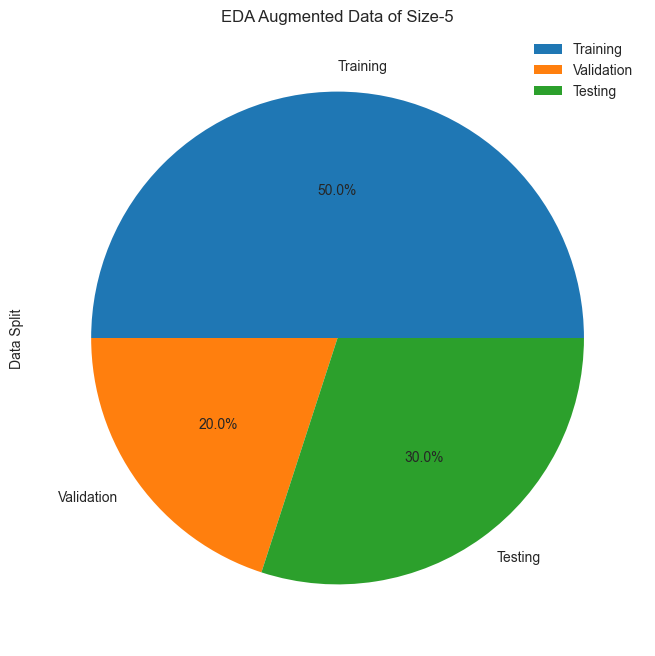

In [35]:
preprocess.records_per_set(train=eda_size_5_train,
                           val=eda_size_5_val,
                           test=eda_size_5_test,
                           title="EDA Augmented Data of Size-5")

##### Training Set - Before Preprocessing

[INFO] Minimum Number of Charaters in a query is:  1
[INFO] Maximum Number of Charaters in a query is:  173


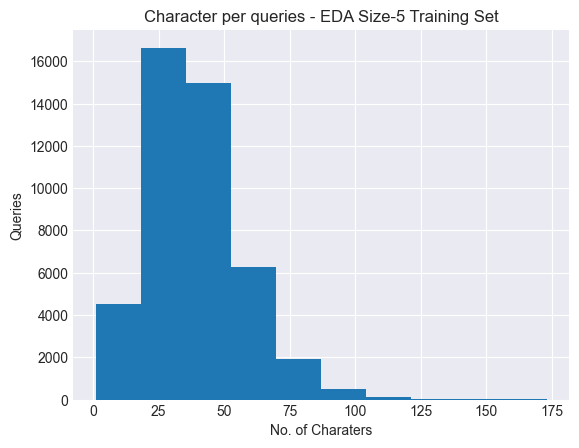

[INFO] Minimum Number of Words in a query is:  1
[INFO] Maximum Number of Words in a query is:  32


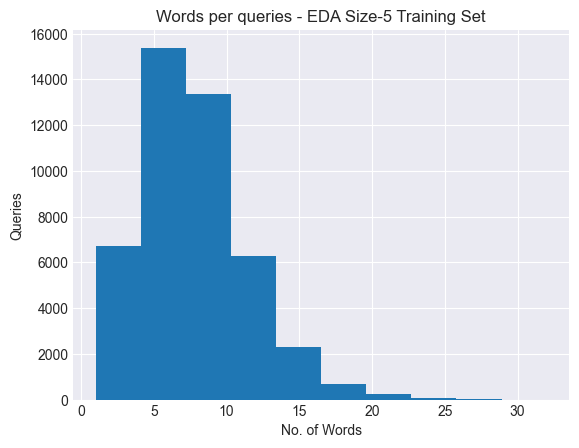

[INFO] Minimum Number of Average Words Length in a query is:  1.0
[INFO] Maximum Number of Average Words Length in a query is:  11.333333333333334


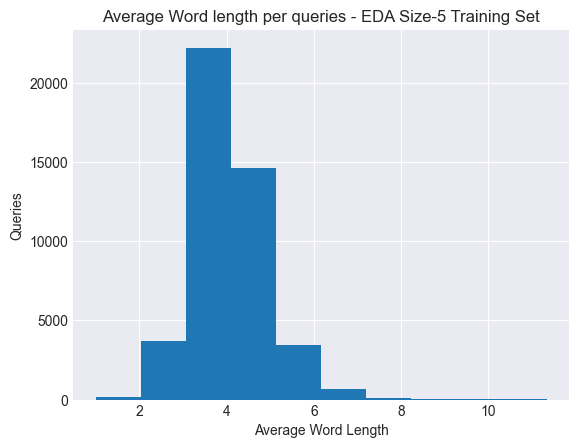


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  8849


In [36]:
# exploring the training data
train_explore_eda5 = preprocess.eda(data=eda_size_5_train,
                               path=os.path.join(augment_plot_path, r"EDA\Before_Preprocessing\Training"))
# plotting number of character per record
train_explore_eda5.char_per_query(title="EDA Size-5 Training Set")
# plotting number of words per record
train_explore_eda5.word_per_query(title="EDA Size-5 Training Set")
# plotting average word length per record
train_explore_eda5.avg_word_len_per_query(title="EDA Size-5 Training Set")
# line graph of word frequency per class
train_word_freq_dict_eda5 = train_explore_eda5.word_freq_per_class(title="EDA Size-5 Training Set")
# worldcloud of word frequency per class
train_worldcloud_dict_eda5 = train_explore_eda5.word_cloud_per_class(
    title="EDA Size-35Training Set")
# number of unique words
train_num_unique_words_eda5 = train_explore_eda5.vocabulary()
print("\n[INFO] The vocabulary size is: ", train_num_unique_words_eda5)

The length of the queries is the tarining set is not long. Most queries has in 5 to 10 words, highest beign 25.

##### Validation Set - Before Preprocessing

[INFO] Minimum Number of Charaters in a query is:  1
[INFO] Maximum Number of Charaters in a query is:  181


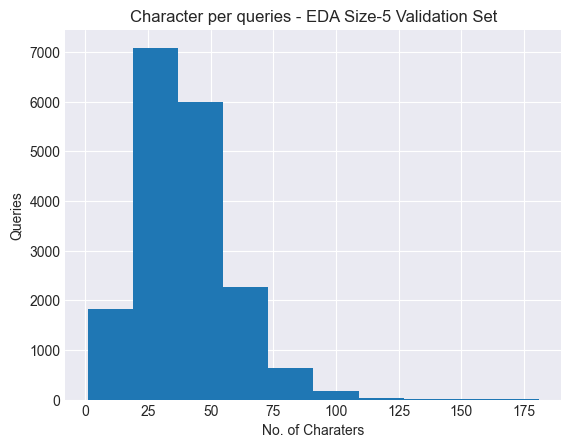

[INFO] Minimum Number of Words in a query is:  1
[INFO] Maximum Number of Words in a query is:  31


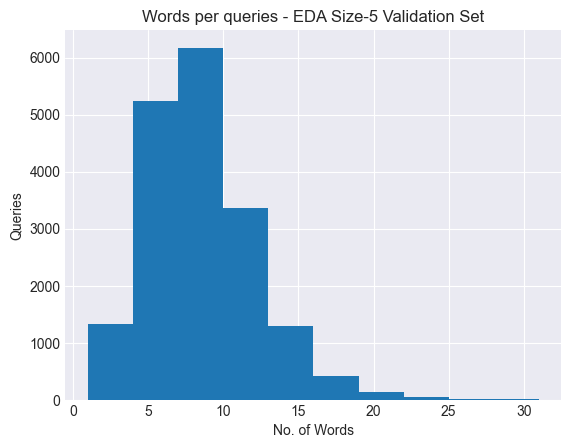

[INFO] Minimum Number of Average Words Length in a query is:  1.0
[INFO] Maximum Number of Average Words Length in a query is:  11.0


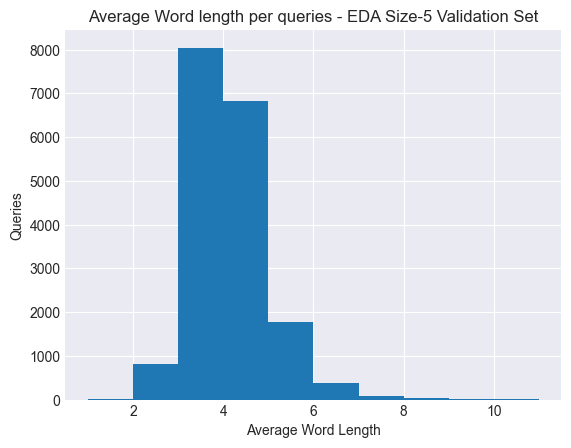


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  6674


In [37]:
# exploring the validation data
val_explore_eda5 = preprocess.eda(data=eda_size_5_val,
                             path=os.path.join(augment_plot_path, r"EDA\Before_Preprocessing\Validation"))
# plotting number of character per record
val_explore_eda5.char_per_query(title="EDA Size-5 Validation Set")
# plotting number of words per record
val_explore_eda5.word_per_query(title="EDA Size-5 Validation Set")
# plotting average word length per record
val_explore_eda5.avg_word_len_per_query(title="EDA Size-5 Validation Set")
# line graph of word frequency per class
val_word_freq_dict_eda5 = val_explore_eda5.word_freq_per_class(title="EDA Size-5 Validation Set")
# worldcloud of word frequency per class
val_worldcloud_dict_eda5 = val_explore_eda5.word_cloud_per_class(
    title="EDA Size-5 Validation Set")
# number of unique words
val_num_unique_words_eda5 = val_explore_eda5.vocabulary()
print("\n[INFO] The vocabulary size is: ", val_num_unique_words_eda5)

The average word

##### Testing Set - Before Preprocessing

[INFO] Minimum Number of Charaters in a query is:  1
[INFO] Maximum Number of Charaters in a query is:  170


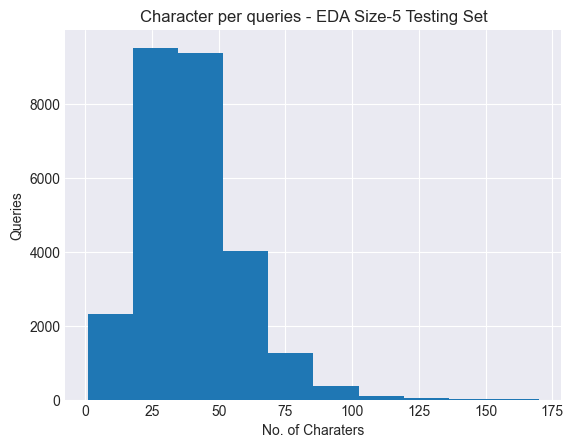

[INFO] Minimum Number of Words in a query is:  1
[INFO] Maximum Number of Words in a query is:  33


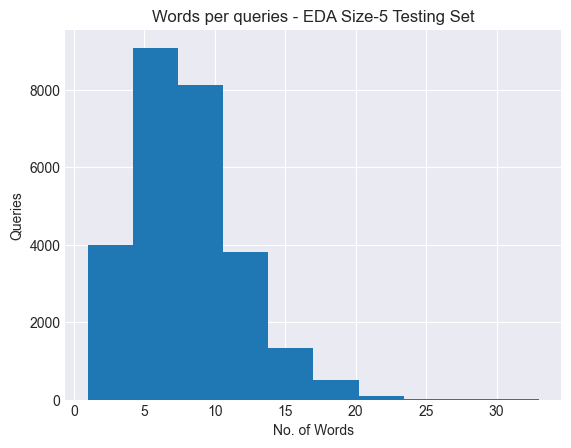

[INFO] Minimum Number of Average Words Length in a query is:  1.0
[INFO] Maximum Number of Average Words Length in a query is:  12.0


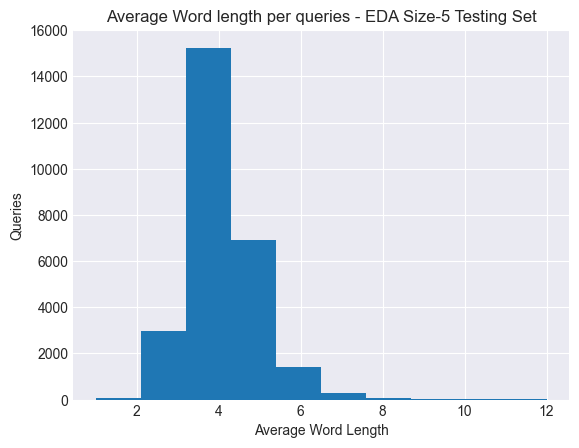


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  7784


In [38]:
# exploring the testing data
test_explore_eda5 = preprocess.eda(data=eda_size_5_test,
                              path=os.path.join(augment_plot_path, r"EDA\Before_Preprocessing\Testing"))
# plotting number of character per record
test_explore_eda5.char_per_query(title="EDA Size-5 Testing Set")
# plotting number of words per record
test_explore_eda5.word_per_query(title="EDA Size-5 Testing Set")
# plotting average word length per record
test_explore_eda5.avg_word_len_per_query(title="EDA Size-5 Testing Set")
# line graph of word frequency per class
test_word_freq_dict_eda5 = test_explore_eda5.word_freq_per_class(title="EDA Size-5 Testing Set")
# worldcloud of word frequency per class
test_worldcloud_dict_eda5 = test_explore_eda5.word_cloud_per_class(title="EDA Size-5 Testing Set")
# number of unique words
test_num_unique_words_eda5 = test_explore_eda5.vocabulary()
print("\n[INFO] The vocabulary size is: ", test_num_unique_words_eda5)

### Preprocessing the EDA Size-3 Augmented Data 

In [29]:
# preprocessing the training set
train_preprocess_eda5 = preprocess.pre_process(eda_size_5_train)
x_train_eda5 = train_preprocess_eda5.preprocess()
# lemmentizing the preprocessed data
x_train_eda5 = train_preprocess_eda5.lemmatise()

# encoding the classes to one-hot format
y_train_eda5 = train_preprocess_eda5.encode_class()

In [30]:
# preprocessing the validation set
val_preprocess_eda5 = preprocess.pre_process(eda_size_5_val)
x_val_eda5 = val_preprocess_eda3.preprocess()
# lemmentizing the preprocessed data
x_val_eda5 = val_preprocess_eda5.lemmatise()

# encoding the classes to one-hot format
y_val_eda5 = val_preprocess_eda5.encode_class()

In [31]:
# preprocessing the testing set
test_preprocess_eda5 = preprocess.pre_process(eda_size_5_test)
x_test_eda5 = test_preprocess_eda5.preprocess()
# lemmentizing the preprocessed data
x_test_eda5 = test_preprocess_eda5.lemmatise()

# encoding the classes to one-hot format
y_test_eda5 = test_preprocess_eda5.encode_class()

### Exploring the Processed EDA Size-3 Augmented Datasets

##### Training Set

[INFO] Minimum Number of Charaters in a query is:  0
[INFO] Maximum Number of Charaters in a query is:  134


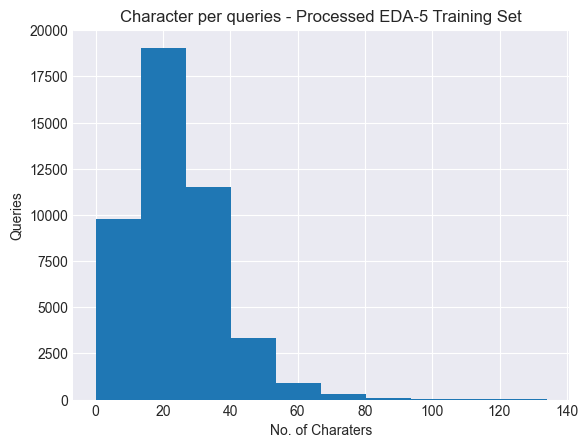

[INFO] Minimum Number of Words in a query is:  0
[INFO] Maximum Number of Words in a query is:  20


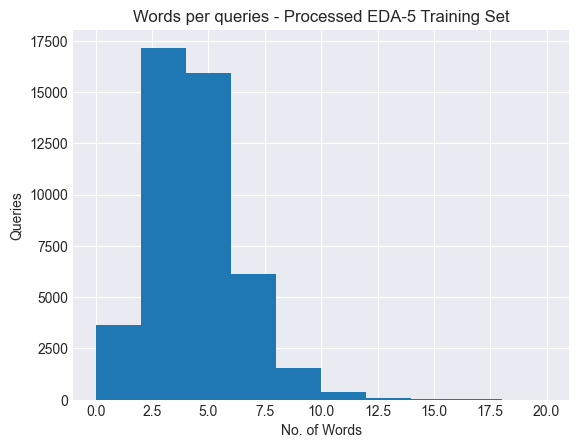

c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[INFO] Minimum Number of Average Words Length in a query is:  1.0
[INFO] Maximum Number of Average Words Length in a query is:  15.0


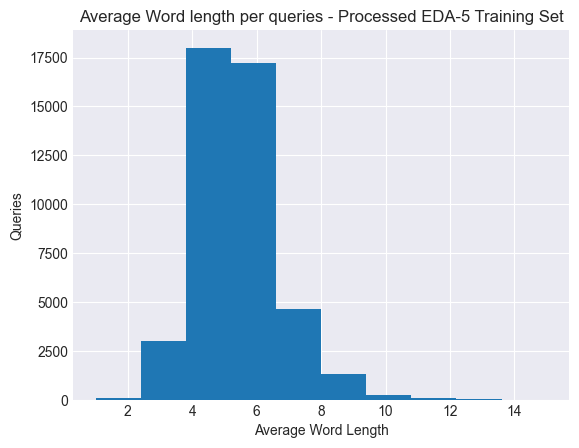


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  7241


In [42]:
# creating processed training dataframe
processed_train_df_eda5 = pd.DataFrame(({"Query": x_train_eda5,
                                    "Intent": eda_size_5_train.iloc[:, 1]}))
# exploring the processed training data
processed_train_explore_eda5 = preprocess.eda(data=processed_train_df_eda5,
                                         path=os.path.join(augment_plot_path, r"EDA\Preprocessed\Training"))
# plotting number of character per record
processed_train_explore_eda5.char_per_query(title="Processed EDA-5 Training Set")
# plotting number of words per record
processed_train_explore_eda5.word_per_query(title="Processed EDA-5 Training Set")
# plotting average word length per record
processed_train_explore_eda5.avg_word_len_per_query(title="Processed EDA-5 Training Set")
# line graph of word frequency per class
processed_train_word_freq_dict_eda5 = processed_train_explore_eda5.word_freq_per_class(
    title="Processed EDA-5 Training Set")
# worldcloud of word frequency per class
processed_train_worldcloud_dict_eda5 = processed_train_explore_eda5.word_cloud_per_class(
    title="Processed EDA-5 Training Set")
# number of unique words
processed_train_num_unique_words_eda5 = processed_train_explore_eda5.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_train_num_unique_words_eda5)

##### Validation Set

[INFO] Minimum Number of Charaters in a query is:  1
[INFO] Maximum Number of Charaters in a query is:  181


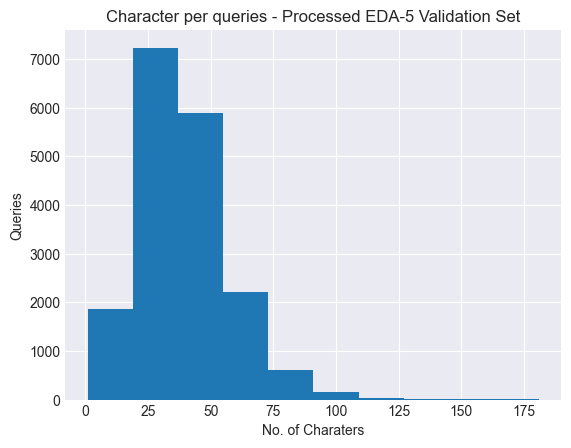

[INFO] Minimum Number of Words in a query is:  1
[INFO] Maximum Number of Words in a query is:  31


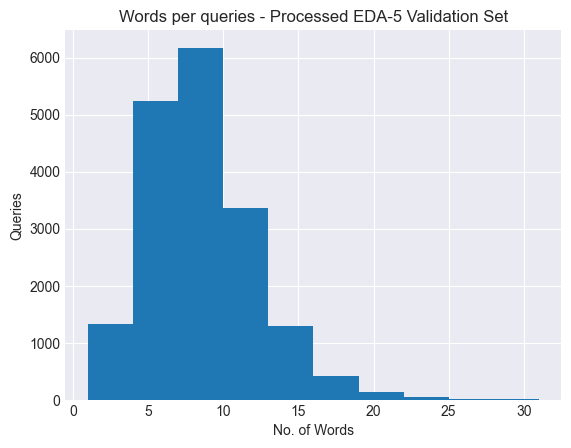

[INFO] Minimum Number of Average Words Length in a query is:  1.0
[INFO] Maximum Number of Average Words Length in a query is:  11.0


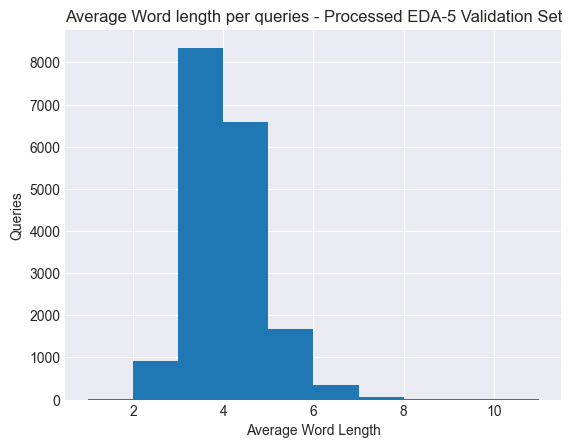


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  6316


In [43]:
# creating processed validation dataframe
processed_val_df_eda5 = pd.DataFrame(({"Query": x_val_eda5,
                                       "Intent": eda_size_5_val.iloc[:, 1]}))
# exploring the processed validation data
processed_val_explore_eda5 = preprocess.eda(data=processed_val_df_eda5,
                                            path=os.path.join(augment_plot_path, r"EDA\Preprocessed\Validation"))
# plotting number of character per record
processed_val_explore_eda5.char_per_query(
    title="Processed EDA-5 Validation Set")
# plotting number of words per record
processed_val_explore_eda5.word_per_query(
    title="Processed EDA-5 Validation Set")
# plotting average word length per record
processed_val_explore_eda5.avg_word_len_per_query(
    title="Processed EDA-5 Validation Set")
# line graph of word frequency per class
processed_val_word_freq_dict_eda5 = processed_val_explore_eda5.word_freq_per_class(
    title="Processed EDA-5 Validation Set")
# worldcloud of word frequency per class
processed_val_worldcloud_dict_eda5 = processed_val_explore_eda5.word_cloud_per_class(
    title="Processed EDA-5 Validation Set")
# number of unique words
processed_val_num_unique_words_eda5 = processed_val_explore_eda5.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_val_num_unique_words_eda5)

##### Testing Set

[INFO] Minimum Number of Charaters in a query is:  0
[INFO] Maximum Number of Charaters in a query is:  129


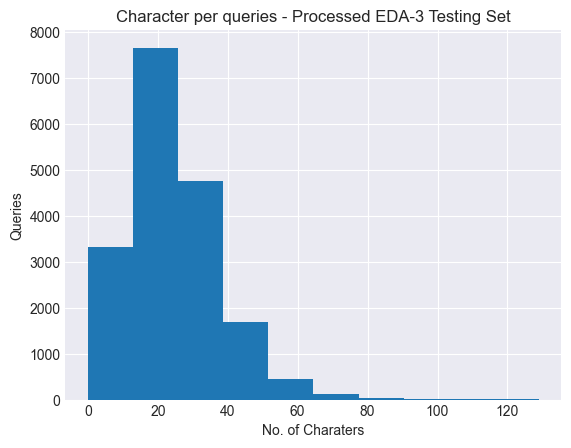

[INFO] Minimum Number of Words in a query is:  0
[INFO] Maximum Number of Words in a query is:  19


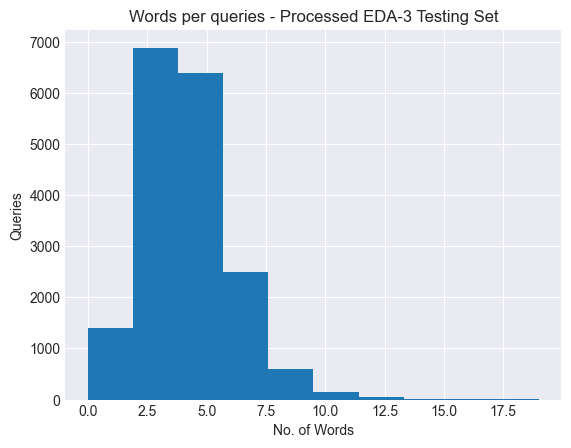

c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[INFO] Minimum Number of Average Words Length in a query is:  1.0
[INFO] Maximum Number of Average Words Length in a query is:  14.0


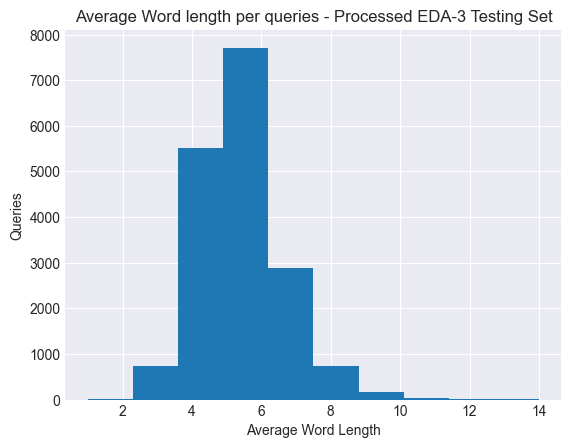


[INFO] Creating 20 Highest Frequency Words for all Classes...
	Created & Saved.

[INFO] Creating WordCloud for all classes...
	Created & Saved.

[INFO] The vocabulary size is:  5505


In [44]:
# creating processed testing dataframe
processed_test_df_eda3 = pd.DataFrame(({"Query": x_test_eda3,
                                   "Intent": eda_size_3_test.iloc[:, 1]}))
# exploring the processed testing data
processed_test_explore_eda3 = preprocess.eda(data=processed_test_df_eda3,
                                        path=os.path.join(augment_plot_path, r"EDA\Preprocessed\Testing"))
# plotting number of character per record
processed_test_explore_eda3.char_per_query(title="Processed EDA-3 Testing Set")
# plotting number of words per record
processed_test_explore_eda3.word_per_query(title="Processed EDA-3 Testing Set")
# plotting average word length per record
processed_test_explore_eda3.avg_word_len_per_query(title="Processed EDA-3 Testing Set")
# line graph of word frequency per class
processed_test_word_freq_dict_eda3 = processed_test_explore_eda3.word_freq_per_class(
    title="Processed EDA-3 Testing Set")
# worldcloud of word frequency per class
processed_test_worldcloud_dict_eda3 = processed_test_explore_eda3.word_cloud_per_class(
    title="Processed EDA-3 Testing Set")
# number of unique words
processed_test_num_unique_words_eda3 = processed_test_explore_eda3.vocabulary()
print("\n[INFO] The vocabulary size is: ", processed_test_num_unique_words_eda3)

### Creating a textvectorization layer using Keras

In [36]:
# creating a keras text vector layer
textvector_layer_eda5 = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE,
                                                     ngrams=(1, 2, 3),
                                                     output_mode="int",
                                                     output_sequence_length=SEQ_LEN)
# learning the vocabulary in the dataset from training data
textvector_layer_eda5.adapt(x_train_eda5)

### Single-LSTM

#### Training the Single Layer LSTM Model with best Auto-Hyperparameter on EDA size-5

##### For 30 Epochs

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 3.3117e-05 - f1_score: 0.0101 - loss: 4.8580 - precision: 0.1451 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0216 - val_loss: 3.9171 - val_precision: 0.0000e+00
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 1.8295e-06 - f1_score: 0.1036 - loss: 3.3777 - precision: 0.3743 - val_accuracy: 0.0000e+00 - val_f1_score: 0.3026 - val_loss: 2.4091 - val_precision: 0.7623
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 6.2848e-05 - f1_score: 0.4250 - loss: 2.0028 - precision: 0.7367 - val_accuracy: 0.0000e+00 - val_f1_score: 0.5842 - val_loss: 1.6104 - val_precision: 0.8338
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 7.2710e-04 - f1_score: 0.6563 - loss: 1.5540 - precision: 0.8448 - val_accuracy: 0.0000e+00 - val_f1_score: 0.6612 - val_loss: 1.3845 - val_precision: 0.8260
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 4.0334e-04 - f1_score: 0.7724 - lo

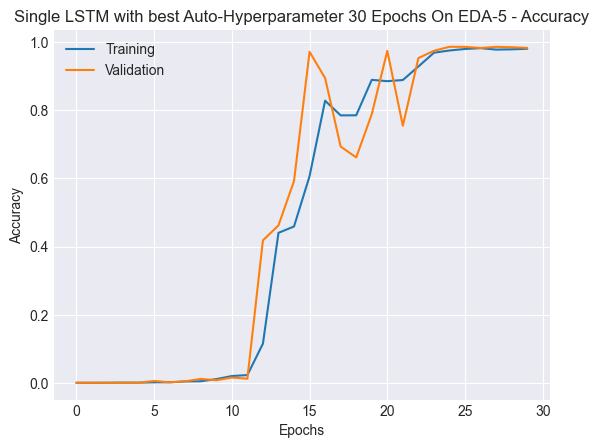

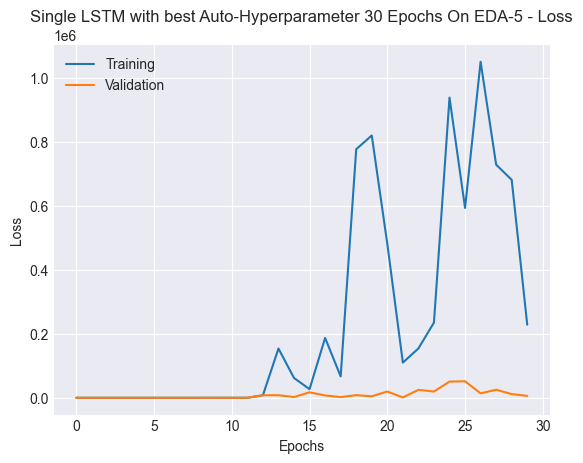

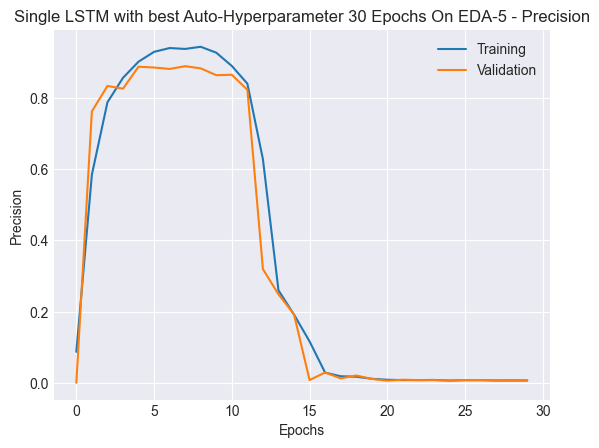

844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9802 - f1_score: 0.0035 - loss: 8632.9268 - precision: 0.0069


<Figure size 640x480 with 0 Axes>

In [37]:
# single lstm model with tuned hyperparamter
hp_lstm_model_30_eda5 = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                     lstm_units=170,
                                                     rate=0.275,
                                                     activation="elu",
                                                     optimizer="RMSprop",
                                                     lr=0.0038393475795542604,
                                                     num_class=preprocess.num_intent,
                                                     vocab_size=VOCAB_SIZE,
                                                     textvector_layer=textvector_layer_eda5)

# fitting the single lstm model to full original dataset
hp_lstm_history_30_eda5 = train_lstm.model_history(x=x_train_eda5, y=y_train_eda5,
                                                   x_val=x_val_eda5,
                                                   y_val=y_val_eda5,
                                                   path=single_lstm_model_callback,
                                                   model=hp_lstm_model_30_eda5,
                                                   batch_size=96,
                                                   epochs=30,
                                                   filename="hp_96Batch_30epochs_eda5")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_30_eda5,
                title="Single LSTM with best Auto-Hyperparameter 30 Epochs On EDA-5",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Single_LSTM"))

# evaluating the model with test dataset
hp_lstm_model_30_evaluate_eda5 = hp_lstm_model_30_eda5.evaluate(
    x=x_test_eda5, y=y_test_eda5, verbose=1)

##### For 50 Epochs

In [ ]:
# single lstm model with tuned hyperparamter
hp_lstm_model_50_eda5 = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                lstm_units=170,
                                                rate=0.275,
                                                activation="elu",
                                                optimizer="RMSprop",
                                                lr=0.0038393475795542604,
                                                num_class=preprocess.num_intent,
                                                vocab_size=VOCAB_SIZE,
                                                textvector_layer=textvector_layer_eda5)

# fitting the single lstm model to full original dataset
hp_lstm_history_50_eda5 = train_lstm.model_history(x=x_train_eda5, y=y_train_eda5,
                                              x_val=x_val_eda5,
                                              y_val=y_val_eda5,
                                              path=single_lstm_model_callback,
                                              model=hp_lstm_model_50_eda5,
                                              batch_size=96,
                                              epochs=50,
                                              filename="hp_96Batch_50epochs_eda5")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_50_eda5,
                title="Single LSTM with best Auto-Hyperparameter 50 Epochs On EDA-5",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Single_LSTM"))

# evaluating the model with test dataset
hp_lstm_model_50_evaluate_eda5 = hp_lstm_model_50_eda5.evaluate(
    x=x_test_eda5, y=y_test_eda5, verbose=1)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 7.5516e-05 - f1_score: 0.0080 - loss: 4.9004 - precision: 0.1058 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0085 - val_loss: 4.4283 - val_precision: 0.0000e+00
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 82ms/step - accuracy: 0.0021 - f1_score: 0.0641 - loss: 321.9492 - precision: 0.1878 - val_accuracy: 0.4415 - val_f1_score: 0.0600 - val_loss: 790.0896 - val_precision: 0.0061
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - accuracy: 0.3376 - f1_score: 0.0671 - loss: 106122.8906 - precision: 0.0174 - val_accuracy: 0.4577 - val_f1_score: 0.0241 - val_loss: 157.4875 - val_precision: 0.0088
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 84ms/step - accuracy: 0.2893 - f1_score: 0.0331 - loss: 21522.0918 - precision: 0.0140 - val_accuracy: 0.2275 - val_f1_score: 0.0259 - val_loss: 508.1629 - val_precision: 0.0232
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - accuracy: 0.3439 - f1_score: 0.0213 - loss: 38893.8

##### For 75 Epochs


Epoch 1/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 1.9604e-04 - f1_score: 0.0026 - loss: 5.0690 - precision: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_f1_score: 4.7580e-04 - val_loss: 5.0474 - val_precision: 0.0000e+00
Epoch 2/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 4.6944e-05 - f1_score: 0.0072 - loss: 4.7518 - precision: 0.1025 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0031 - val_loss: 4.6899 - val_precision: 0.0000e+00
Epoch 3/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.0000e+00 - f1_score: 0.0223 - loss: 4.1712 - precision: 0.0082 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0188 - val_loss: 3.7730 - val_precision: 0.0909
Epoch 4/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 1.5663e-05 - f1_score: 0.0573 - loss: 3.6281 - precision: 0.2666 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0618 - val_loss: 3.4036 - val_precision: 0.2989
Epoch 5/75
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 2.8562e-06 - f1_score: 0.

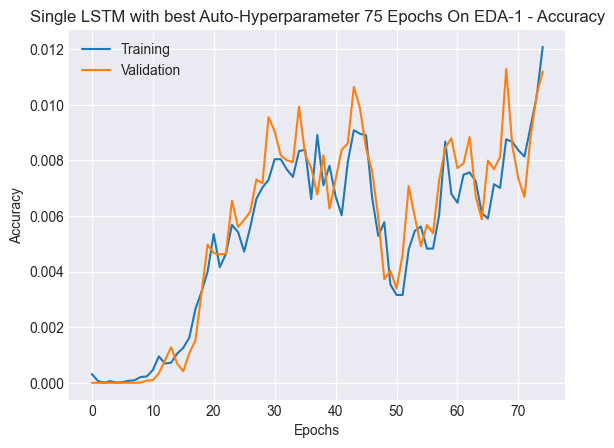

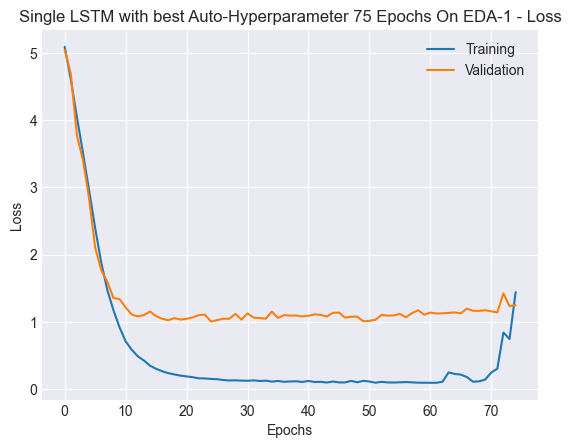

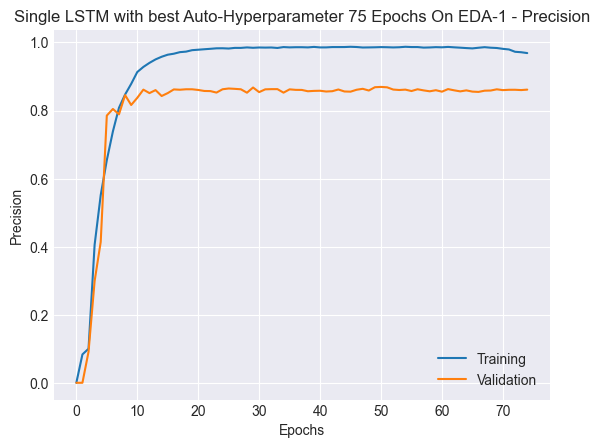

282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0092 - f1_score: 0.8120 - loss: 1.2064 - precision: 0.8612


<Figure size 640x480 with 0 Axes>

In [ ]:
# single lstm model with tuned hyperparamter
hp_lstm_model_75_eda5 = train_lstm.single_lstm_model(embedding_seq_length=70,
                                                lstm_units=170,
                                                rate=0.275,
                                                activation="elu",
                                                optimizer="RMSprop",
                                                lr=0.0038393475795542604,
                                                num_class=preprocess.num_intent,
                                                vocab_size=VOCAB_SIZE,
                                                textvector_layer=textvector_layer_eda5)

# fitting the single lstm model to full original dataset
hp_lstm_history_75_eda5 = train_lstm.model_history(x=x_train_eda5, y=y_train_eda5,
                                              x_val=x_val_eda5,
                                              y_val=y_val_eda5,
                                              path=single_lstm_model_callback,
                                              model=hp_lstm_model_75_eda5,
                                              batch_size=96,
                                              epochs=75,
                                              filename="hp_96Batch_75epochs_eda5")
# plottiing the mertics
train_lstm.plot(history=hp_lstm_history_75_eda5,
                title="Single LSTM with best Auto-Hyperparameter 75 Epochs On EDA-5",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Single_LSTM"))

# evaluating the model with test dataset
hp_lstm_model_75_evaluate_eda5 = hp_lstm_model_75_eda5.evaluate(
    x=x_test_eda5, y=y_test_eda5, verbose=1)

#### Training the Single Layer LSTM Model with Last best Sets of Auto-Hyperparameter on EDA size-5

##### For 30 Epochs

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 1.4289e-04 - f1_score: 0.0438 - loss: 4.5823 - precision: 0.3669 - val_accuracy: 4.4778e-04 - val_f1_score: 0.5085 - val_loss: 2.0084 - val_precision: 0.8701
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.0062 - f1_score: 0.7198 - loss: 1.1651 - precision: 0.9079 - val_accuracy: 0.0645 - val_f1_score: 0.1550 - val_loss: 22.6028 - val_precision: 0.2226
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.2933 - f1_score: 0.0485 - loss: 2423.1099 - precision: 0.0545 - val_accuracy: 0.5541 - val_f1_score: 0.0027 - val_loss: 194.6138 - val_precision: 0.0058
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.8452 - f1_score: 0.0059 - loss: 34119.7695 - precision: 0.0064 - val_accuracy: 0.6596 - val_f1_score: 0.0029 - val_loss: 321.4161 - val_precision: 0.0077
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - accuracy: 0.7844 - f1_score: 0.0063 - loss: 11150.5127 - pre

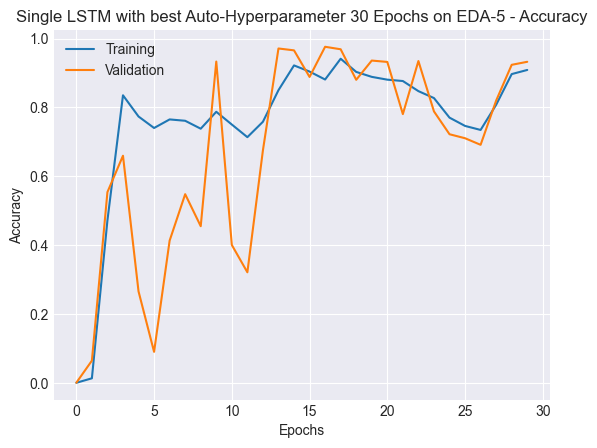

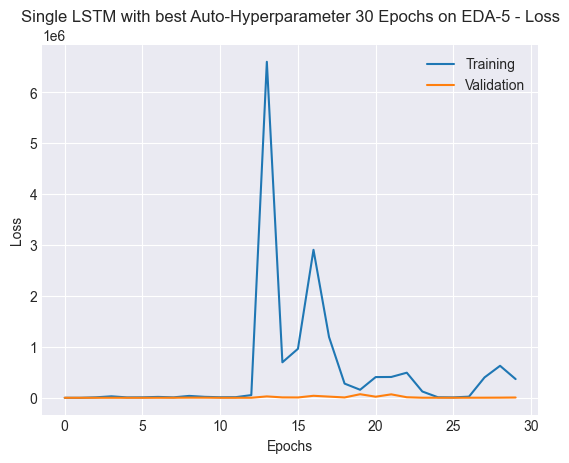

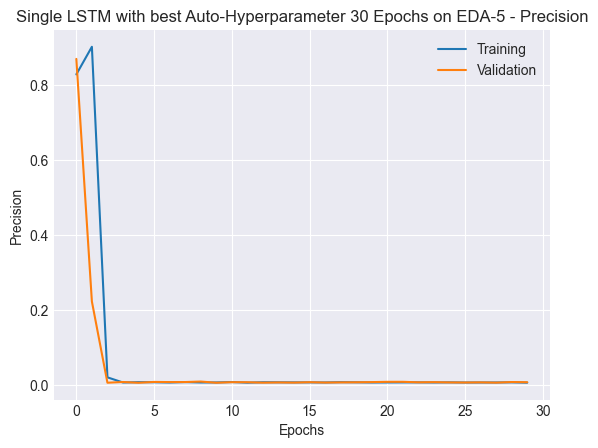

844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9529 - f1_score: 0.0033 - loss: 7990.4258 - precision: 0.0057


<Figure size 640x480 with 0 Axes>

In [33]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_30_eda5 = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                    lstm_units=35,
                                                    rate=0.275,
                                                    activation="elu",
                                                    optimizer="Nadam",
                                                    lr=0.007121072966581653,
                                                    num_class=preprocess.num_intent,
                                                    vocab_size=VOCAB_SIZE,
                                                    textvector_layer=textvector_layer_eda5)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_30_eda5 = train_lstm.model_history(x=x_train_eda5, y=y_train_eda5,
                                                  x_val=x_val_eda5,
                                                  y_val=y_val_eda5,
                                                  path=single_lstm_model_callback,
                                                  model=old_hp_lstm_model_30_eda5,
                                                  batch_size=192,
                                                  epochs=30,
                                                  filename="old_hp_192Batch_30epochs_eda5")
# plottiing the mertics
train_lstm.plot(history=old_hp_lstm_history_30_eda5,
                title="Single LSTM with best Auto-Hyperparameter 30 Epochs on EDA-5",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_lstm_model_30_evaluate_eda5 = old_hp_lstm_model_30_eda5.evaluate(
    x=x_test_eda5, y=y_test_eda5, verbose=1)

##### For 50 Epochs

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 1.7541e-05 - f1_score: 0.0504 - loss: 4.5021 - precision: 0.4408 - val_accuracy: 1.5296e-04 - val_f1_score: 0.5915 - val_loss: 1.7055 - val_precision: 0.8952
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.0041 - f1_score: 0.7624 - loss: 1.0011 - precision: 0.9148 - val_accuracy: 0.0010 - val_f1_score: 0.7502 - val_loss: 1.0181 - val_precision: 0.8827
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.0130 - f1_score: 0.9148 - loss: 0.3681 - precision: 0.9657 - val_accuracy: 0.0029 - val_f1_score: 0.7747 - val_loss: 0.9166 - val_precision: 0.8838
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.0217 - f1_score: 0.9371 - loss: 0.2522 - precision: 0.9737 - val_accuracy: 0.0062 - val_f1_score: 0.7815 - val_loss: 0.9301 - val_precision: 0.8713
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - accuracy: 0.0314 - f1_score: 0.9461 - loss: 0.2134 - precision: 0.9759 -

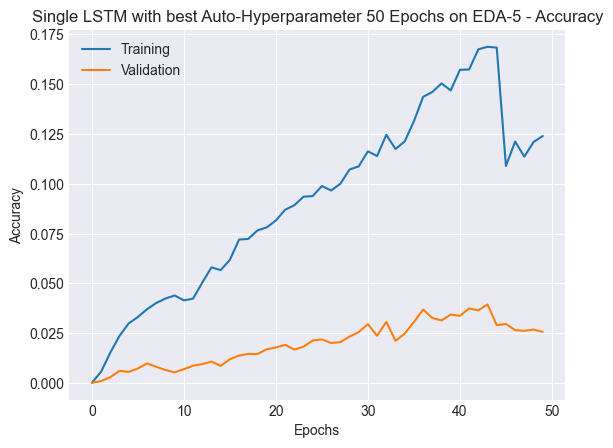

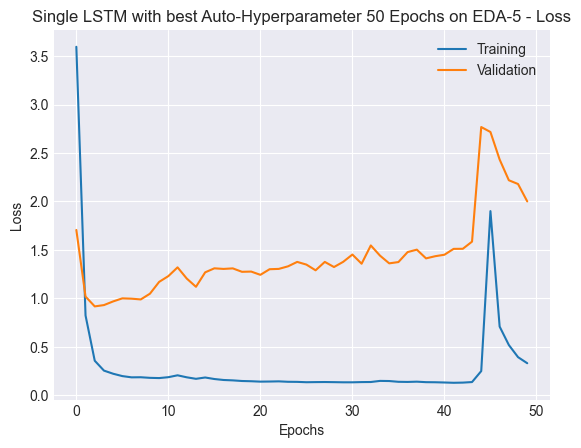

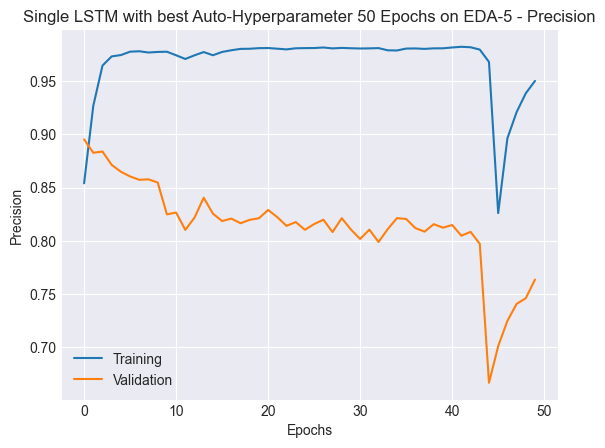

844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1045 - f1_score: 0.8427 - loss: 1.0278 - precision: 0.8913


<Figure size 640x480 with 0 Axes>

In [34]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_50_eda5 = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                    lstm_units=35,
                                                    rate=0.275,
                                                    activation="elu",
                                                    optimizer="Nadam",
                                                    lr=0.007121072966581653,
                                                    num_class=preprocess.num_intent,
                                                    vocab_size=VOCAB_SIZE,
                                                    textvector_layer=textvector_layer_eda5)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_50_eda5 = train_lstm.model_history(x=x_train_eda5, y=y_train_eda5,
                                                  x_val=x_val_eda5,
                                                  y_val=y_val_eda5,
                                                  path=single_lstm_model_callback,
                                                  model=old_hp_lstm_model_50_eda5,
                                                  batch_size=192,
                                                  epochs=50,
                                                  filename="old_hp_192Batch_50epochs_eda5")
# plottiing the mertics
train_lstm.plot(history=old_hp_lstm_history_50_eda5,
                title="Single LSTM with best Auto-Hyperparameter 50 Epochs on EDA-5",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_lstm_model_50_evaluate_eda5 = old_hp_lstm_model_50_eda5.evaluate(
    x=x_test_eda5, y=y_test_eda5, verbose=1)

##### For 75 Epochs

Epoch 1/75
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 1.9059e-07 - f1_score: 0.0319 - loss: 4.5795 - precision: 0.2897 - val_accuracy: 1.1111e-06 - val_f1_score: 0.4624 - val_loss: 2.0716 - val_precision: 0.9195
Epoch 2/75
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.0019 - f1_score: 0.6899 - loss: 1.2274 - precision: 0.9037 - val_accuracy: 9.6889e-04 - val_f1_score: 0.7594 - val_loss: 1.0654 - val_precision: 0.9223
Epoch 3/75
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.0130 - f1_score: 0.9088 - loss: 0.3855 - precision: 0.9609 - val_accuracy: 0.0026 - val_f1_score: 0.7756 - val_loss: 0.9248 - val_precision: 0.8979
Epoch 4/75
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.0243 - f1_score: 0.9380 - loss: 0.2565 - precision: 0.9716 - val_accuracy: 0.0040 - val_f1_score: 0.7793 - val_loss: 0.9358 - val_precision: 0.8954
Epoch 5/75
235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.0300 - f1_score: 0.9449 - loss: 0.2176 - precision: 0.97

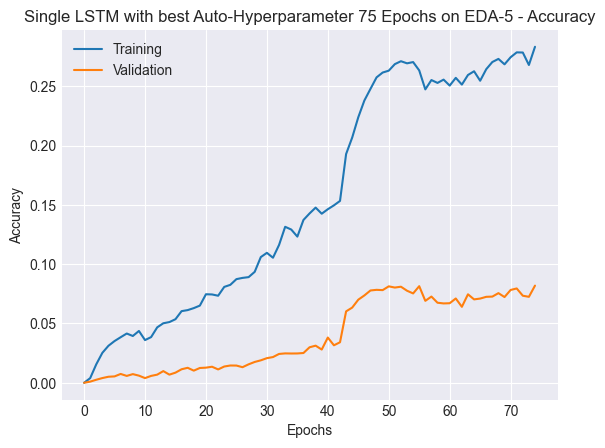

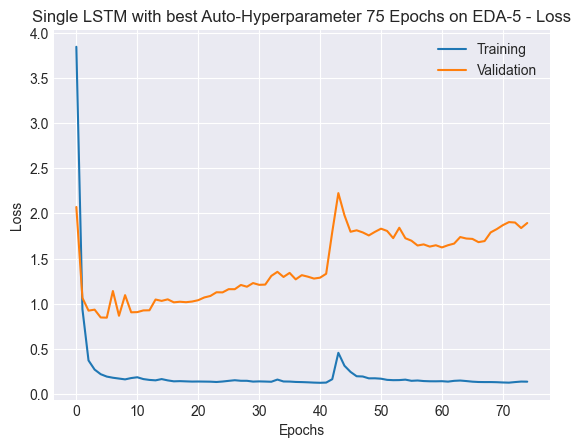

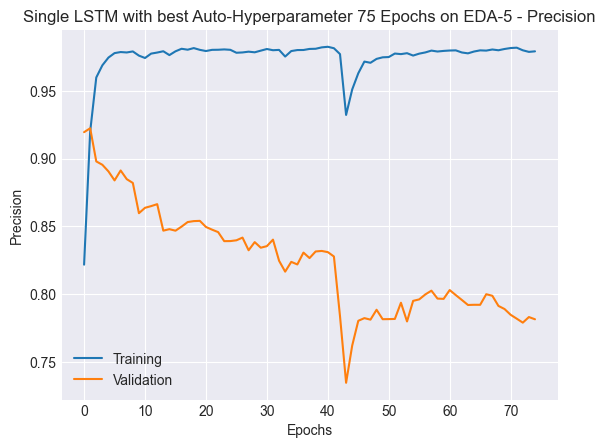

844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2456 - f1_score: 0.8683 - loss: 1.0273 - precision: 0.8996


<Figure size 640x480 with 0 Axes>

In [35]:
# single lstm model with tuned hyperparamter
old_hp_lstm_model_75_eda5 = train_lstm.single_lstm_model(embedding_seq_length=110,
                                                         lstm_units=35,
                                                         rate=0.275,
                                                         activation="elu",
                                                         optimizer="Nadam",
                                                         lr=0.007121072966581653,
                                                         num_class=preprocess.num_intent,
                                                         vocab_size=VOCAB_SIZE,
                                                         textvector_layer=textvector_layer_eda5)

# fitting the single lstm model to full original dataset
old_hp_lstm_history_75_eda5 = train_lstm.model_history(x=x_train_eda5, y=y_train_eda5,
                                                       x_val=x_val_eda5,
                                                       y_val=y_val_eda5,
                                                       path=single_lstm_model_callback,
                                                       model=old_hp_lstm_model_75_eda5,
                                                       batch_size=192,
                                                       epochs=75,
                                                       filename="old_hp_192Batch_75epochs_eda5")

train_lstm.plot(history=old_hp_lstm_history_75_eda5,
                title="Single LSTM with best Auto-Hyperparameter 75 Epochs on EDA-5",
                path=os.path.join(augment_plot_path, r"EDA\Under_Overfitting\Old"))

# evaluating the model with test dataset
old_hp_lstm_model_75_evaluate_eda5 = old_hp_lstm_model_75_eda5.evaluate(
    x=x_test_eda5, y=y_test_eda5, verbose=1)